In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
import matplotlib.cm as cm
from glob import glob
from collections import Counter
#import seaborn as sns
import math
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import scipy.integrate as integrate
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
import os.path
import single_psr_evolv as psrevol

import unit_convert
import GCE as gce
import ns
import history_cmc as hic
import dynamics as dyn
import psr_catalog as pc
import cluster_sampling_v1 as csv1

%matplotlib inline

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1095/syr904/projects/GCE/'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

2.1.2


/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(0.0001, 10)

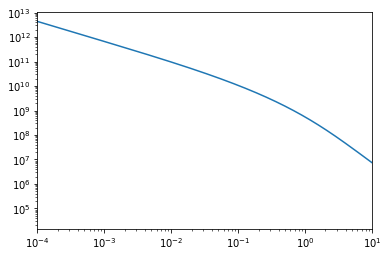

In [2]:
data = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/galaxy_profile.txt')

plt.figure()
plt.plot(data[:,0], data[:,1])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10)

66
56 1 /projects/b1091/CMC_Grid_March2019/rundir/rv1/rg8/z0.02/2e5/ 1.0 1.0
63 1 /projects/b1091/CMC_Grid_March2019/rundir/rv1/rg20/z0.0002/1.6e6/ 1.0 1.0
65 1 /projects/b1091/CMC_Grid_March2019/rundir/rv1/rg20/z0.002/4e5/ 1.0 1.0
79 1 /projects/b1091/CMC_Grid_March2019/rundir/rv2/rg2/z0.002/1.6e6/ 1.0 1.0
102 1 /projects/b1091/CMC_Grid_March2019/rundir/rv2/rg20/z0.002/8e5/ 1.0 1.0
104 1 /projects/b1091/CMC_Grid_March2019/rundir/rv2/rg20/z0.02/2e5/ 1.0 1.0
114 2 /projects/b1091/CMC_Grid_March2019/rundir/rv4/rg2/z0.002/8e5/ 1.0 1.0
129 1 /projects/b1091/CMC_Grid_March2019/rundir/rv4/rg8/z0.02/4e5/ 1.0 1.0
139 1 /projects/b1091/CMC_Grid_March2019/rundir/rv4/rg20/z0.002/1.6e6/ 4.0 4.0
141 1 /projects/b1091/CMC_Grid_March2019/rundir/rv4/rg20/z0.02/4e5/ 1.0 1.0


Text(0.5,1,'Only MSPs')

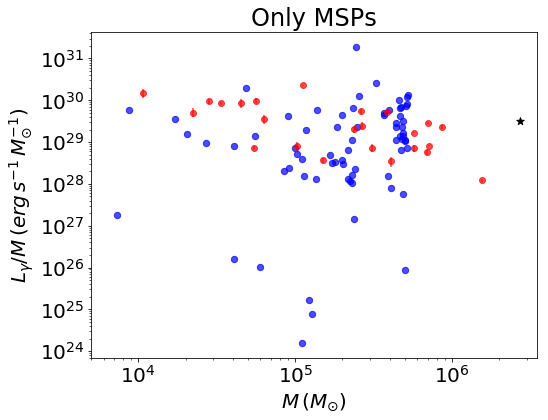

In [7]:
##Plot L_gamma vs. Total mass of the  GCs
L_gamma_tot, L_gamma_msp, L_gamma_psr, M = gce.find_Lgammaray_lastsnapshot('/projects/b1095/syr904/projects/GCE/catalog/', 0.1)
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
status = pathlist[:,1]; paths = pathlist[:,0]
clusterproperty = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/clusterproperty_maingrid_last.dat')
Npsr = clusterproperty[:,10]; Nmsp = clusterproperty[:,11]

Lgamma_obs=np.genfromtxt('/projects/b1095/syr904/projects/GCE/lgamma.txt')
mass_obs=np.array(Lgamma_obs[:,0]); lgamma_obs=np.array(Lgamma_obs[:,1])
lgamma_obs_max=np.array(Lgamma_obs[:,2]); lgamma_obs_min=np.array(Lgamma_obs[:,3])
lgamma_lowerr=lgamma_obs-lgamma_obs_min; lgamma_uperr=lgamma_obs_max-lgamma_obs
lgamma_error=[lgamma_lowerr, lgamma_uperr]

#print(L_gamma_tot)
#print(len(L_gamma_tot), len(L_gamma_msp))

#index=[]
#for i in range(len(L_gamma_tot)):
#    if L_gamma_tot[i]==0.:
#        index.append(i)
#    if L_gamma_tot[i]/M[i]<=10**28 and L_gamma_tot[i]/M[i]>0:
#        print(i, status[i])
#        #index.append(i)
        
index_msp = []
for j in range(len(L_gamma_msp)):
    if L_gamma_msp[j]==0.:
        index_msp.append(j)
    if L_gamma_msp[j]/M[j]<=10**28 and L_gamma_msp[j]/M[j]>0:
        print(j, status[j], paths[j], Npsr[j], Nmsp[j])
        
        
#L_tot_new = [x for y, x in enumerate(L_gamma_tot) if y not in index]
#M_new = [m for n, m in enumerate(M) if n not in index]
#L_tot_new=np.array(L_tot_new); M=np.array(M)

L_msp_new = [x for y, x in enumerate(L_gamma_msp) if y not in index_msp]
M_msp_new = [m for n, m in enumerate(M) if n not in index_msp]
L_msp_new=np.array(L_msp_new); M_msp_new=np.array(M_msp_new)

#Lzero=np.where(L_gamma==0)[0]
#L_gamma=np.delete(L_gamma, Lzero); M=np.delete(M, Lzero)
#print L_gamma, M#, Lzero

matplotlib.rcParams.update({'font.size': 20})

plt.figure(figsize=(8, 6))
plt.scatter(M_msp_new, L_msp_new/M_msp_new, color='b', s=40, alpha=0.7)
plt.errorbar(mass_obs, lgamma_obs, yerr=lgamma_error, fmt='o', color='red', alpha=0.7)
plt.scatter(2.699e6, 8.515579e+35/2.699e6, marker = '*', s = 60, color = 'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5*10**3, 3.5*10**6)
plt.xlabel(r'$M\,(M_{\odot})$')
plt.ylabel(r'$L_{\gamma}/M\,(erg\,s^{-1}\,M_{\odot}^{-1})$')
plt.title('Only MSPs')

#plt.savefig(figsave+'Gamma_M_msp.pdf', dpi=300)

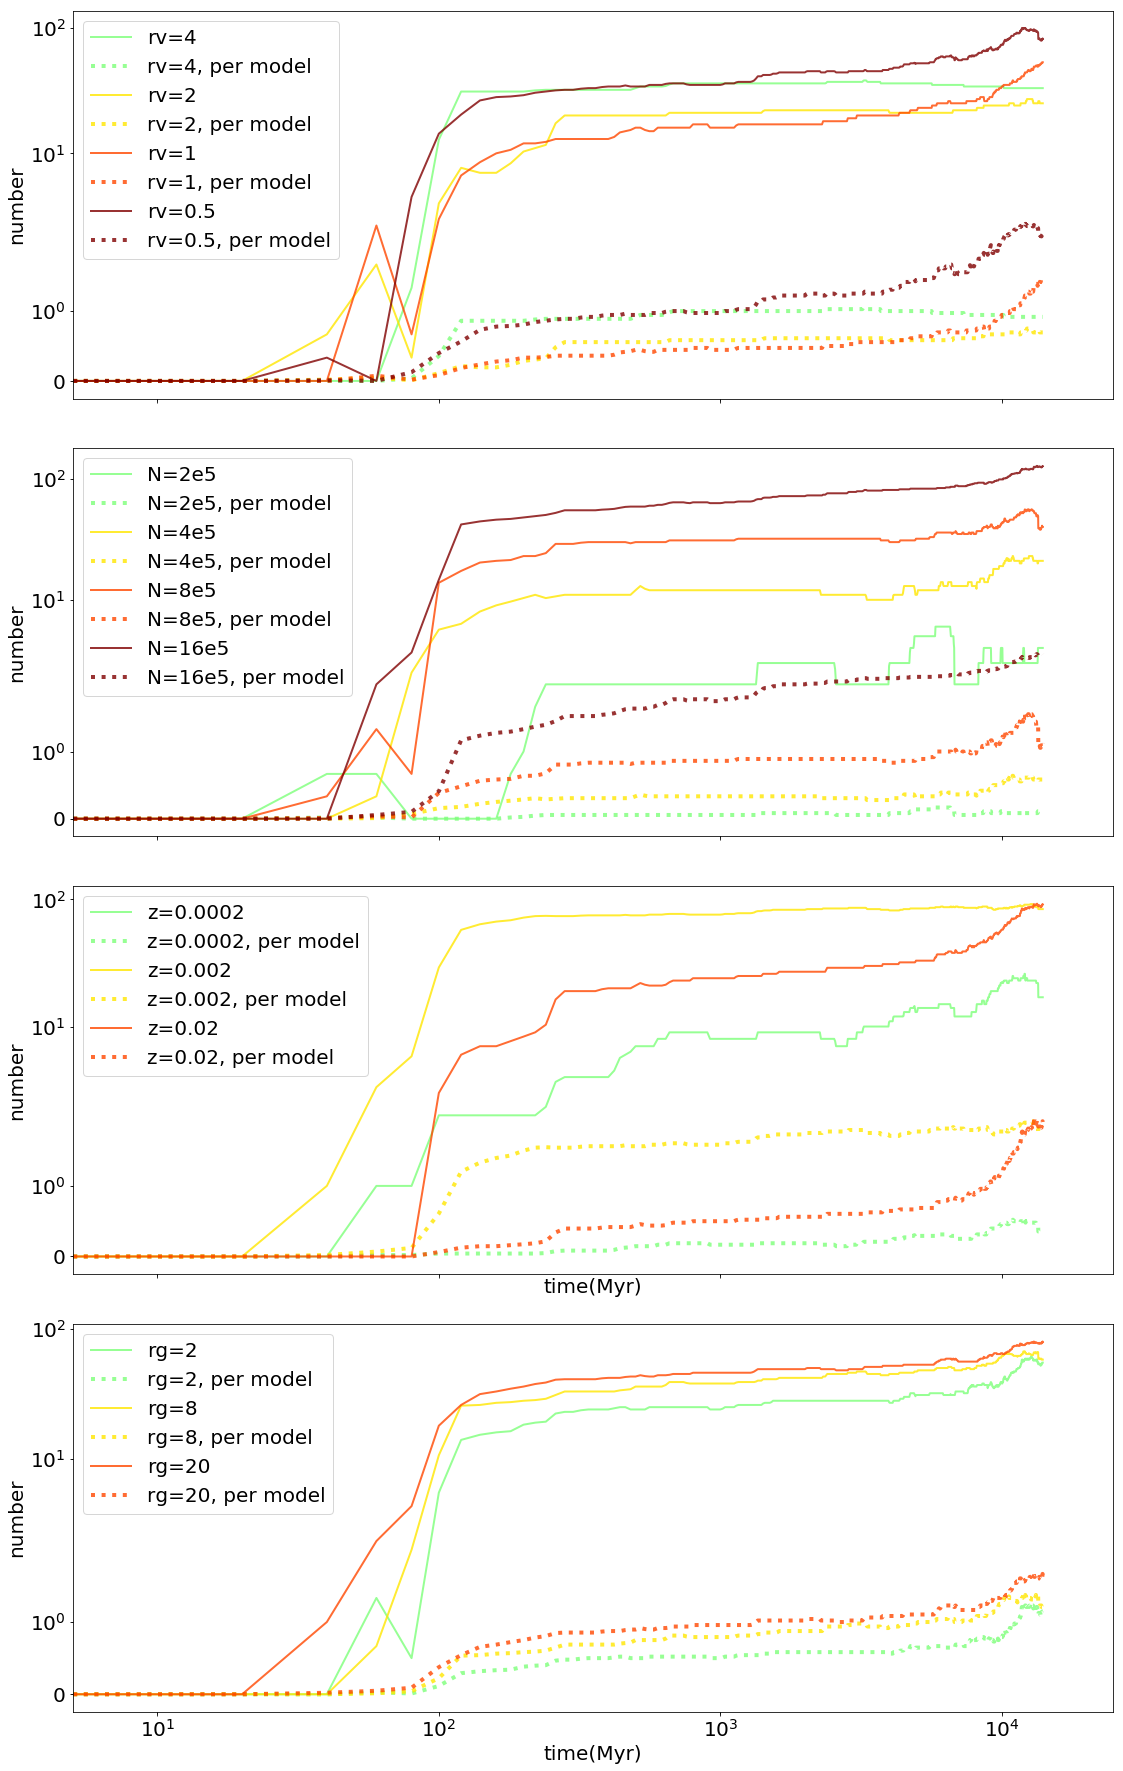

In [6]:
##Plot number of pulsars vs. time
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

n_model_mass = [0,0,0,0]; n_model_rv = [0,0,0,0]; n_model_z = [0,0,0]; n_model_rg = [0,0,0]
for ii in range(len(paths)):
    ##Initial Conditions
    s=paths[ii].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if n_star==200000.:# and status[ii]=='1': 
        n_model_mass[0]+=1
    if n_star==400000.:# and status[ii]=='1': 
        n_model_mass[1]+=1
    if n_star==800000.:# and status[ii]=='1': 
        n_model_mass[2]+=1
    if n_star==1600000.:# and status[ii]=='1': 
        n_model_mass[3]+=1
        
    if rv==4.:# and status[ii]=='1': 
        n_model_rv[0]+=1
    if rv==2.:# and status[ii]=='1': 
        n_model_rv[1]+=1
    if rv==1.:# and status[ii]=='1': 
        n_model_rv[2]+=1
    if rv==0.5:# and status[ii]=='1': 
        n_model_rv[3]+=1
        
        
    if z==0.0002:# and status[ii]=='1': 
        n_model_z[0]+=1
    if z==0.002:# and status[ii]=='1': 
        n_model_z[1]+=1
    if z==0.02:# and status[ii]=='1': 
        n_model_z[2]+=1
        
        
    if rg==2:# and status[ii]=='1': 
        n_model_rg[0]+=1
    if rg==8:# and status[ii]=='1': 
        n_model_rg[1]+=1
    if rg==20:# and status[ii]=='1': 
        n_model_rg[2]+=1
        
        
        
        
#print(n_model_mass, n_model_rv, n_model_z)

##Grouping models        
n_msp_rv = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_rv_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

n_msp_mass = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_mass_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

n_msp_z = [np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_z_average = [np.zeros(700),np.zeros(700),np.zeros(700)]

n_msp_rg = [np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_rg_average = [np.zeros(700),np.zeros(700),np.zeros(700)]
#print(n_msp_rv)

t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
        
    t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
    datans = np.genfromtxt(paths[kk]+'initial.ns.dat')
    times = np.array(datans[:,0])*t_conv
    n_psr = datans[:,5]; n_msp = datans[:,6]
        
    ##Interpolate the number of NS data
    f = interp1d(times, n_msp, kind='nearest')
    t_interpld = np.linspace(0, np.max(times), 2000)
    n_msp_new = f(t_interpld)
    #print(n_msp_new)
    
    n_mass = [[],[],[],[]]; n_rv = [[],[],[],[]]; n_z = [[],[],[]]; n_rg = [[],[],[]]
    for jj in range(len(t_all)-1):
        #print(jj)
        n_mass_temp = [0,0,0,0]; n_rv_temp = [0,0,0,0]; n_z_temp = [0,0,0]; n_rg_temp = [0,0,0]
        count_mass = [0,0,0,0]; count_rv = [0,0,0,0]; count_z = [0,0,0]; count_rg = [0,0,0]
            
        ##Group by initial mass
        if n_star==200000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[0]+=n_msp_new[i]
                    count_mass[0]+=1
        
        if n_star==400000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[1]+=n_msp_new[i]
                    count_mass[1]+=1
        
        if n_star==800000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[2]+=n_msp_new[i]
                    count_mass[2]+=1
        
        if n_star==1600000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[3]+=n_msp_new[i]
                    count_mass[3]+=1
            
        ##Group by initial rv   
        if rv==4.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0]+=n_msp_new[i]
                    count_rv[0]+=1
        
        if rv==2.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[1]+=n_msp_new[i]
                    count_rv[1]+=1
        
        if rv==1.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[2]+=n_msp_new[i]
                    count_rv[2]+=1
        
        if rv==0.5:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[3]+=n_msp_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity
        if z==0.0002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0]+=n_msp_new[i]
                    count_z[0]+=1
        
        if z==0.002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[1]+=n_msp_new[i]
                    count_z[1]+=1
        
        if z==0.02:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[2]+=n_msp_new[i]
                    count_z[2]+=1
                    
                    
        ##Group by galactocentric distance
        if rg==2:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rg_temp[0]+=n_msp_new[i]
                    count_rg[0]+=1
        
        if rg==8:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rg_temp[1]+=n_msp_new[i]
                    count_rg[1]+=1
        
        if rg==20:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rg_temp[2]+=n_msp_new[i]
                    count_rg[2]+=1
    
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                n_rv_temp[x] = n_rv_temp[x]/count_rv[x]
            if count_mass[x]!=0:
                n_mass_temp[x] = n_mass_temp[x]/count_mass[x]
                
            n_rv[x].append(n_rv_temp[x])
            n_mass[x].append(n_mass_temp[x])
        
        for x in range(3):
            if count_z[x]!=0:
                n_z_temp[x] = n_z_temp[x]/count_z[x]
            
            n_z[x].append(n_z_temp[x])
            
            
            if count_rg[x]!=0:
                n_rg_temp[x] = n_rg_temp[x]/count_rg[x]
            
            n_rg[x].append(n_rg_temp[x])
                            
            
    for y in range(4):
        n_msp_rv[y] = n_msp_rv[y]+np.array(n_rv[y])
        n_msp_mass[y] = n_msp_mass[y]+np.array(n_mass[y])
        n_msp_rv_average[y] = n_msp_rv_average[y] + np.array(n_rv[y])/n_model_rv[y]
        n_msp_mass_average[y] = n_msp_mass_average[y] + np.array(n_mass[y])/n_model_mass[y]
        
    for y in range(3):
        n_msp_z[y] = n_msp_z[y]+np.array(n_z[y])
        n_msp_z_average[y] = n_msp_z_average[y] + np.array(n_z[y])/n_model_z[y]
        
        n_msp_rg[y] = n_msp_rg[y]+np.array(n_rg[y])
        n_msp_rg_average[y] = n_msp_rg_average[y] + np.array(n_rg[y])/n_model_rg[y]

    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
#print(n_msp_rv[0]); print(type(n_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=4, figsize = (16,25), sharex=True)
for z in range(4):
    n_msp_rv[z] = np.insert(n_msp_rv[z], 0, 0.); n_msp_rv_average[z] = np.insert(n_msp_rv_average[z], 0, 0.)
    n_msp_mass[z] = np.insert(n_msp_mass[z], 0, 0.); n_msp_mass_average[z] = np.insert(n_msp_mass_average[z], 0, 0.)
    axs[0].plot(t_all, n_msp_rv[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, n_msp_mass[z], label = 'N='+mass_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, n_msp_rv_average[z], label = 'rv='+rv_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    axs[1].plot(t_all, n_msp_mass_average[z], label = 'N='+mass_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
     
for z in range(3):
    n_msp_z[z] = np.insert(n_msp_z[z], 0, 0.); n_msp_z_average[z] = np.insert(n_msp_z_average[z], 0, 0.)
    axs[2].plot(t_all, n_msp_z[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[2].plot(t_all, n_msp_z_average[z], label = 'z='+z_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    n_msp_rg[z] = np.insert(n_msp_rg[z], 0, 0.); n_msp_rg_average[z] = np.insert(n_msp_rg_average[z], 0, 0.)
    axs[3].plot(t_all, n_msp_rg[z], label = 'rg='+rg_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[3].plot(t_all, n_msp_rg_average[z], label = 'rg='+rg_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 5)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 5)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

axs[2].set_xscale('symlog')
axs[2].set_yscale('symlog')
axs[2].set_xlim(xmin = 5)
axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('number')
axs[2].legend(loc='best')

axs[3].set_xscale('symlog')
axs[3].set_yscale('symlog')
axs[3].set_xlim(xmin = 5)
axs[3].set_xlabel('time(Myr)')
axs[3].set_ylabel('number')
axs[3].legend(loc='best')

plt.tight_layout()

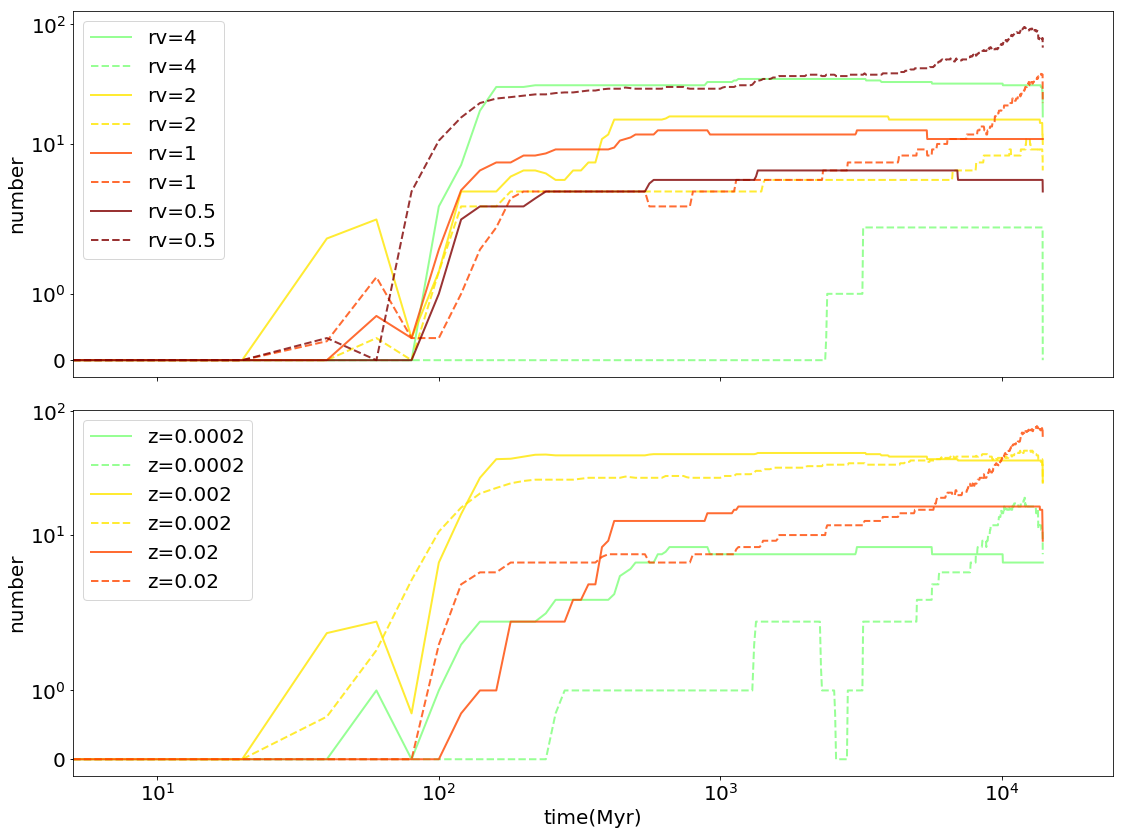

In [3]:
##Plot number of pulsars vs. time for rv models(primordial and dynamical)
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

#nsfiles = np.sort(glob('/projects/b1095/syr904/projects/GCE/catalog/msp_primordial_dynamical_catalog/*'))
pathstr = '/projects/b1095/syr904/projects/GCE/catalog/msp_primordial_dynamical_catalog/ns_pridyn_'

##Grouping models        
n_rv_pri = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_rv_dyn = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_z_pri = [np.zeros(700),np.zeros(700),np.zeros(700)]
n_z_dyn = [np.zeros(700),np.zeros(700),np.zeros(700)]


t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    if not os.path.isfile(pathstr+str(kk)+'.dat'):
        continue
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
        
    #t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
    datans = np.genfromtxt(pathstr+str(kk)+'.dat')
    times = np.array(datans[:,0])
    n_pri = np.array(datans[:,3])+np.array(datans[:,6])
    n_dyn = np.array(datans[:,4])+np.array(datans[:,7])
        
    ##Interpolate the number of NS data
    f_pri = interp1d(times, n_pri, kind='nearest')
    f_dyn = interp1d(times, n_dyn, kind='nearest')
    t_interpld = np.linspace(np.min(times), np.max(times), 2000)
    n_pri_new = f_pri(t_interpld)
    n_dyn_new = f_dyn(t_interpld)
    #print(n_msp_new)
    
    n_rv = [[[],[],[],[]], [[],[],[],[]]]; n_z = [[[],[],[]], [[],[],[]]]
    for jj in range(len(t_all)-1):
        #print(jj)
        n_rv_temp = [[0,0,0,0],[0,0,0,0]]; n_z_temp = [[0,0,0],[0,0,0]]
        count_rv = [0,0,0,0]; count_z = [0,0,0]
            
        ##Group by initial rv   
        if rv==4. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][0]+=n_pri_new[i]
                    n_rv_temp[1][0]+=n_dyn_new[i]
                    count_rv[0]+=1
        
        if rv==2. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][1]+=n_pri_new[i]
                    n_rv_temp[1][1]+=n_dyn_new[i]
                    count_rv[1]+=1
        
        if rv==1. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][2]+=n_pri_new[i]
                    n_rv_temp[1][2]+=n_dyn_new[i]
                    count_rv[2]+=1
        
        if rv==0.5 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0][3]+=n_pri_new[i]
                    n_rv_temp[1][3]+=n_dyn_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity
        if z==0.0002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0][0]+=n_pri_new[i]
                    n_z_temp[1][0]+=n_dyn_new[i]
                    count_z[0]+=1
                    
        if z==0.002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0][1]+=n_pri_new[i]
                    n_z_temp[1][1]+=n_dyn_new[i]
                    count_z[1]+=1
        
        if z==0.02 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0][2]+=n_pri_new[i]
                    n_z_temp[1][2]+=n_dyn_new[i]
                    count_z[2]+=1
    
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                n_rv_temp[0][x] = n_rv_temp[0][x]/count_rv[x]
                n_rv_temp[1][x] = n_rv_temp[1][x]/count_rv[x]
                
            n_rv[0][x].append(n_rv_temp[0][x])
            n_rv[1][x].append(n_rv_temp[1][x])
        
        for x in range(3):
            if count_z[x]!=0:
                n_z_temp[0][x] = n_z_temp[0][x]/count_z[x]
                n_z_temp[1][x] = n_z_temp[1][x]/count_z[x]
            
            n_z[0][x].append(n_z_temp[0][x])
            n_z[1][x].append(n_z_temp[1][x])
                            
            
    for y in range(4):
        n_rv_pri[y] = n_rv_pri[y]+np.array(n_rv[0][y])
        n_rv_dyn[y] = n_rv_dyn[y]+np.array(n_rv[1][y])
       
        
    for y in range(3):
        n_z_pri[y] = n_z_pri[y]+np.array(n_z[0][y])
        n_z_dyn[y] = n_z_dyn[y]+np.array(n_z[1][y])

    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
#print(n_msp_rv[0]); print(type(n_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
z_label = ['0.0002', '0.002', '0.02']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,12), sharex=True)
for z in range(4):
    n_rv_pri[z] = np.insert(n_rv_pri[z], 0, 0.)
    n_rv_dyn[z] = np.insert(n_rv_dyn[z], 0, 0.)
    axs[0].plot(t_all, n_rv_pri[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, n_rv_dyn[z], label = 'rv='+rv_label[z], color = cs[z], ls = '--', lw = 2, alpha=0.8)
     
for z in range(3):
    n_z_pri[z] = np.insert(n_z_pri[z], 0, 0.)
    n_z_dyn[z] = np.insert(n_z_dyn[z], 0, 0.)
    axs[1].plot(t_all, n_z_pri[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, n_z_dyn[z], label = 'z='+z_label[z], color = cs[z], ls = '--', lw = 2, alpha=0.8)
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 5)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 5)
axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

plt.tight_layout()

1000000000000000000000000
{'tmyr': [], 'lmsp': []}


No handles with labels found to put in legend.


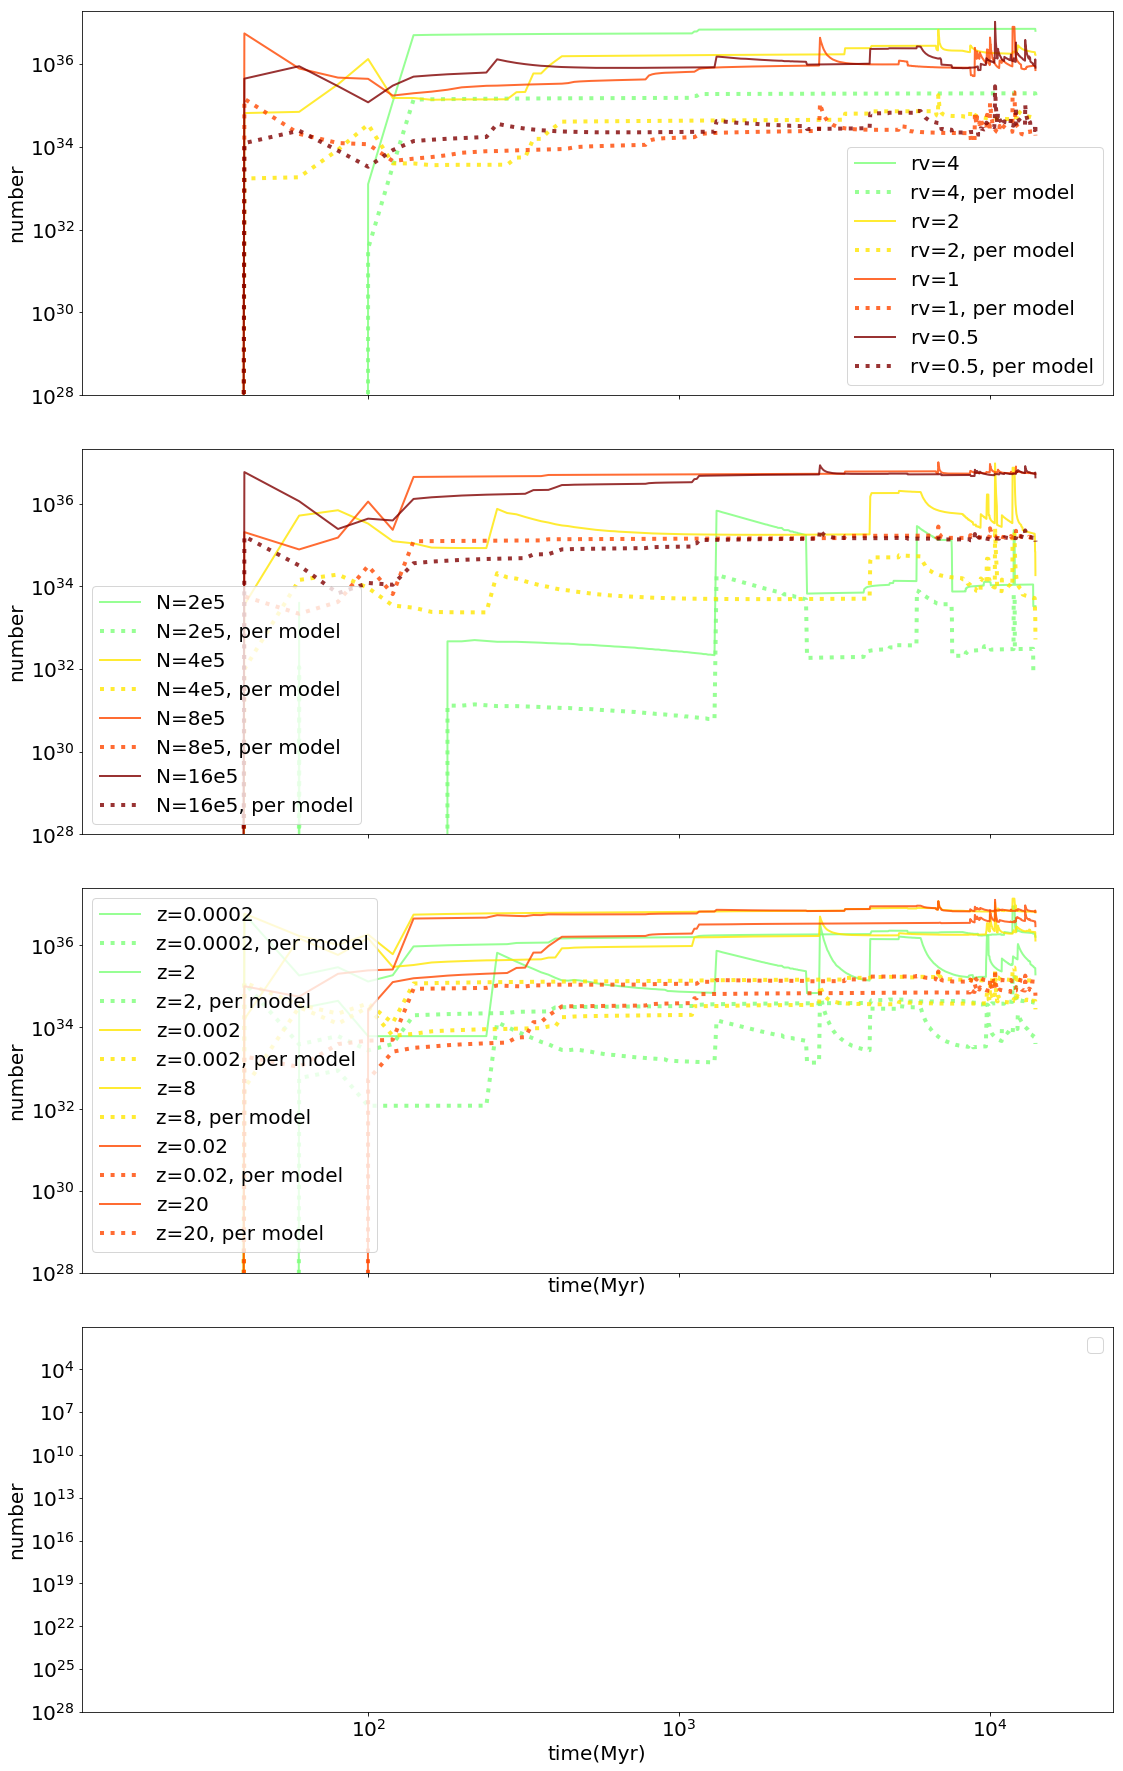

In [4]:
##Distribution of Gamma-ray luminosity vs. time
print(10**24)

data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Lgamma_alltime_maingrid.dat')
model_lg = data_lg[:,0]; t_myr_lg = data_lg[:,1]; Lmsp_lg = data_lg[:,2]

pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

lg_dict = {}
for m in range(len(paths)):
    lg_dict[str(m)] = {}
    lg_dict[str(m)]['tmyr'] = []
    lg_dict[str(m)]['lmsp'] = []
    for n in range(len(model_lg)):
        if int(model_lg[n])==m:
            lg_dict[str(m)]['tmyr'].append(t_myr_lg[n])
            lg_dict[str(m)]['lmsp'].append(Lmsp_lg[n])

print(lg_dict['0'])

n_model_mass = [0,0,0,0]; n_model_rv = [0,0,0,0]; n_model_z = [0,0,0]; n_model_rg = [0,0,0]
for ii in range(len(paths)):
    ##Initial Conditions
    s=paths[ii].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if n_star==200000.:# and status[ii]=='1': 
        n_model_mass[0]+=1
    if n_star==400000.: #and status[ii]=='1': 
        n_model_mass[1]+=1
    if n_star==800000.:# and status[ii]=='1': 
        n_model_mass[2]+=1
    if n_star==1600000.:# and status[ii]=='1': 
        n_model_mass[3]+=1
        
    if rv==4.:# and status[ii]=='1': 
        n_model_rv[0]+=1
    if rv==2.:# and status[ii]=='1': 
        n_model_rv[1]+=1
    if rv==1.:# and status[ii]=='1': 
        n_model_rv[2]+=1
    if rv==0.5:# and status[ii]=='1': 
        n_model_rv[3]+=1
        
        
    if z==0.0002:# and status[ii]=='1': 
        n_model_z[0]+=1
    if z==0.002:# and status[ii]=='1': 
        n_model_z[1]+=1
    if z==0.02:# and status[ii]=='1': 
        n_model_z[2]+=1
        
    
    if rg==2:# and status[ii]=='1': 
        n_model_rg[0]+=1
    if rg==8:# and status[ii]=='1': 
        n_model_rg[1]+=1
    if rg==20:# and status[ii]=='1': 
        n_model_rg[2]+=1
        
#print(n_model_mass, n_model_rv, n_model_z)

##Grouping models        
l_msp_rv = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_rv_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_mass = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_mass_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_z = [np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_z_average = [np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_rg = [np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_rg_average = [np.zeros(700),np.zeros(700),np.zeros(700)]
#print(n_msp_rv)

t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    tmyr = lg_dict[str(kk)]['tmyr']; lmsp = lg_dict[str(kk)]['lmsp']
    
    if not tmyr:
        continue
    
    ##Interpolate the number of NS data
    if len(tmyr)>2:
        f = interp1d(tmyr, lmsp, kind='nearest')
        t_interpld = np.linspace(np.min(tmyr), np.max(tmyr), 1000)
        lmsp_new = f(t_interpld)
        #print(n_msp_new)
    else:
        t_interpld = tmyr
        lmsp_new = lmsp
    
    l_mass = [[],[],[],[]]; l_rv = [[],[],[],[]]; l_z = [[],[],[]]; l_rg = [[],[],[]]
    for jj in range(len(t_all)-1):
        l_mass_temp = [0,0,0,0]; l_rv_temp = [0,0,0,0]; l_z_temp = [0,0,0]; l_rg_temp = [0,0,0]
        count_mass = [0,0,0,0]; count_rv = [0,0,0,0]; count_z = [0,0,0]; count_rg = [0,0,0]
            
        ##Group by initial mass
        if n_star==200000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[0]+=lmsp_new[i]
                    count_mass[0]+=1
        
        if n_star==400000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[1]+=lmsp_new[i]
                    count_mass[1]+=1
        
        if n_star==800000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[2]+=lmsp_new[i]
                    count_mass[2]+=1
        
        if n_star==1600000.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[3]+=lmsp_new[i]
                    count_mass[3]+=1
            
        ##Group by initial rv   
        if rv==4.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[0]+=lmsp_new[i]
                    count_rv[0]+=1
        
        if rv==2.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[1]+=lmsp_new[i]
                    count_rv[1]+=1
        
        if rv==1.:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[2]+=lmsp_new[i]
                    count_rv[2]+=1
        
        if rv==0.5:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[3]+=lmsp_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity   
        if z==0.0002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[0]+=lmsp_new[i]
                    count_z[0]+=1
        
        if z==0.002:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[1]+=lmsp_new[i]
                    count_z[1]+=1
        
        if z==0.02:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[2]+=lmsp_new[i]
                    count_z[2]+=1
        
        
        ##Group by galactocentric distance   
        if rg==2:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rg_temp[0]+=lmsp_new[i]
                    count_rg[0]+=1
        
        if rg==8:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rg_temp[1]+=lmsp_new[i]
                    count_rg[1]+=1
        
        if rg==20:# and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rg_temp[2]+=lmsp_new[i]
                    count_rg[2]+=1
        
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                l_rv_temp[x] = l_rv_temp[x]/count_rv[x]
            if count_mass[x]!=0:
                l_mass_temp[x] = l_mass_temp[x]/count_mass[x]
                
            l_rv[x].append(l_rv_temp[x])
            l_mass[x].append(l_mass_temp[x])
            
        for x in range(3):
            if count_z[x]!=0:
                l_z_temp[x] = l_z_temp[x]/count_z[x]
                
            l_z[x].append(l_z_temp[x])
            
            if count_rg[x]!=0:
                l_rg_temp[x] = l_rg_temp[x]/count_rg[x]
                
            l_rg[x].append(l_rg_temp[x])
            
            
    for y in range(4):
        l_msp_rv[y] = l_msp_rv[y]+np.array(l_rv[y])
        l_msp_mass[y] = l_msp_mass[y]+np.array(l_mass[y])
        l_msp_rv_average[y] = l_msp_rv_average[y] + np.array(l_rv[y])/n_model_rv[y]
        l_msp_mass_average[y] = l_msp_mass_average[y] + np.array(l_mass[y])/n_model_mass[y]
        
    for y in range(3):
        l_msp_z[y] = l_msp_z[y]+np.array(l_z[y])
        l_msp_z_average[y] = l_msp_z_average[y] + np.array(l_z[y])/n_model_z[y]
        
        l_msp_rg[y] = l_msp_rg[y]+np.array(l_rg[y])
        l_msp_rg_average[y] = l_msp_rg_average[y] + np.array(l_rg[y])/n_model_rg[y]


    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
#print(l_msp_rv[0]); print(type(l_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
rg_label = ['2', '8', '20']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=4, figsize = (16,25), sharex=True)
for z in range(4):
    l_msp_rv[z] = np.insert(l_msp_rv[z], 0, 0.); l_msp_rv_average[z] = np.insert(l_msp_rv_average[z], 0, 0.)
    l_msp_mass[z] = np.insert(l_msp_mass[z], 0, 0.); l_msp_mass_average[z] = np.insert(l_msp_mass_average[z], 0, 0.)
    axs[0].plot(t_all, l_msp_rv[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, l_msp_mass[z], label = 'N='+mass_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, l_msp_rv_average[z], label = 'rv='+rv_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    axs[1].plot(t_all, l_msp_mass_average[z], label = 'N='+mass_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)

for z in range(3):
    l_msp_z[z] = np.insert(l_msp_z[z], 0, 0.); l_msp_z_average[z] = np.insert(l_msp_z_average[z], 0, 0.)
    axs[2].plot(t_all, l_msp_z[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[2].plot(t_all, l_msp_z_average[z], label = 'z='+z_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    l_msp_rg[z] = np.insert(l_msp_rg[z], 0, 0.); l_msp_rg_average[z] = np.insert(l_msp_rg_average[z], 0, 0.)
    axs[3].plot(t_all, l_msp_rg[z], label = 'rg='+rg_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[3].plot(t_all, l_msp_rg_average[z], label = 'rg='+rg_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('log')
axs[0].set_xlim(xmin = 12)
axs[0].set_ylim(ymin = 10**8*10.**20)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = 12)
axs[1].set_ylim(ymin = 10**8*10.**20)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

axs[2].set_xscale('symlog')
axs[2].set_yscale('log')
axs[2].set_xlim(xmin = 12)
axs[2].set_ylim(ymin = 10**8*10.**20)
axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('number')
axs[2].legend(loc='best')

axs[3].set_xscale('symlog')
axs[3].set_yscale('log')
axs[3].set_xlim(xmin = 12)
axs[3].set_ylim(ymin = 10**8*10.**20)
axs[3].set_xlabel('time(Myr)')
axs[3].set_ylabel('number')
axs[3].legend(loc='best')

plt.tight_layout()

In [ ]:
##Plot Nmsp vs. time and Lmsp vs. time for one model
data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Lgamma_alltime_catalog.dat')
model_lg = data_lg[:,0]; t_myr_lg = data_lg[:,1]; Lmsp_lg = data_lg[:,2]

pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]


lg_dict = {}
for m in range(len(paths)):
    lg_dict[str(m)] = {}
    lg_dict[str(m)]['tmyr'] = []
    lg_dict[str(m)]['lmsp'] = []
    for n in range(len(model_lg)):
        if int(model_lg[n])==m:
            lg_dict[str(m)]['tmyr'].append(t_myr_lg[n])
            lg_dict[str(m)]['lmsp'].append(Lmsp_lg[n])
            
model_no =11
#print(paths[model_no])
datans = np.genfromtxt(paths[model_no]+'initial.ns.dat')
t_conv = dyn.conv('t', paths[model_no]+'initial.conv.sh')
t_tot = np.array(datans[:,0])*t_conv; n_msp = datans[:,6]
#print(n_msp)

#print(lg_dict[str(model_no)]['lmsp'])

matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,12))
axs[0].scatter(t_tot, n_msp)
axs[1].scatter(lg_dict[str(model_no)]['tmyr'], lg_dict[str(model_no)]['lmsp'])

axs[0].set_xscale('symlog')
axs[0].set_xlim(xmin = -0.1)

axs[1].set_xscale('symlog')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = -0.1)
#axs[1].set_ylim(ymin = 10000000.*10.**20)

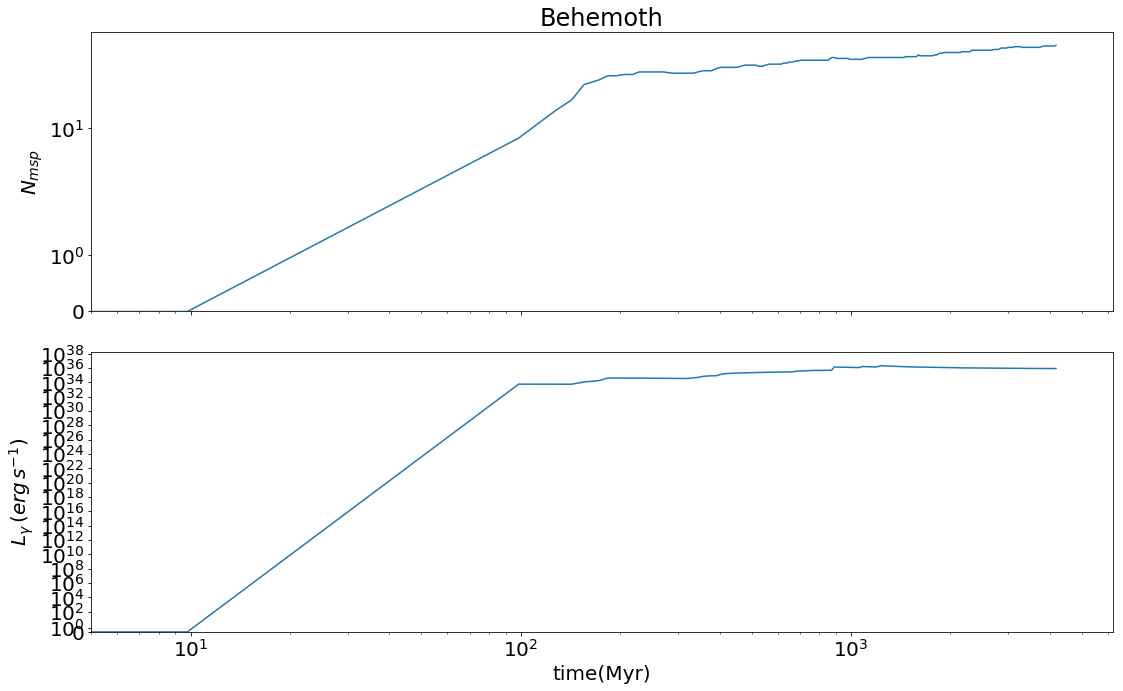

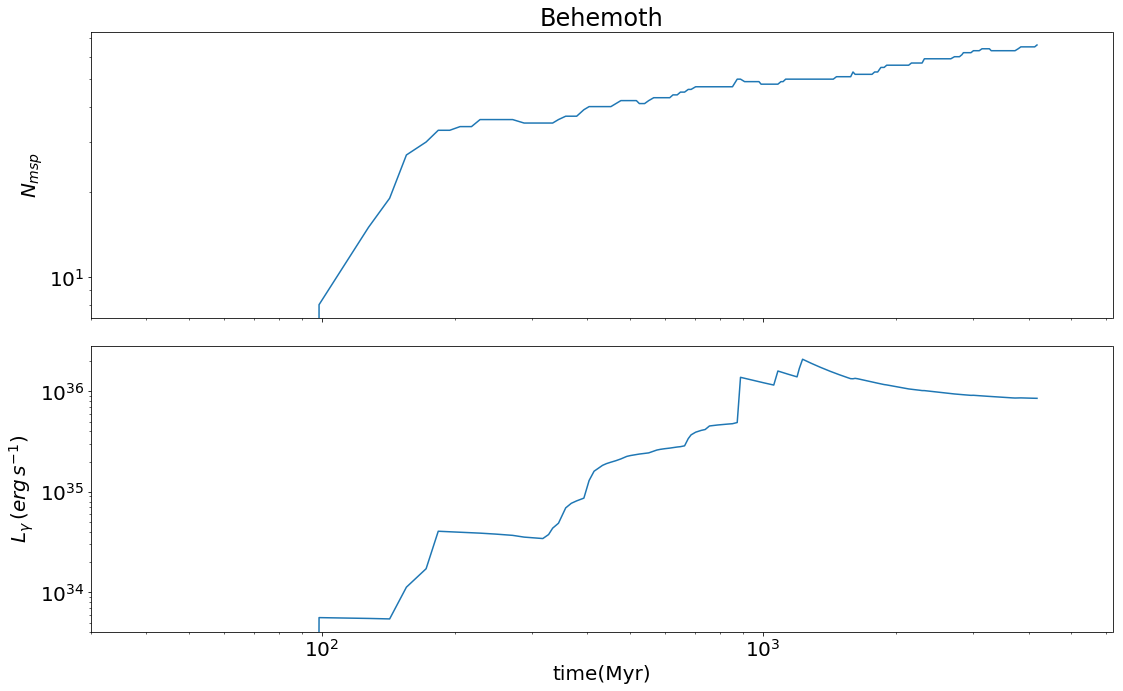

In [8]:
##Behemoth model
##Distribution of Gamma-ray luminosity vs. time and Nmsp vs. time
data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/Lgamma_alltime_behemoth.dat')
t_myr_lg = data_lg[:,0]; lmsp_lg = data_lg[:,2]

data_nns = np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/ns.dat')
t_ns = data_nns[:,0]; Nmsp = data_nns[:,6]
t_conv = 4422.11
t_ns = t_conv*np.array(t_ns)


matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,10), sharex=True)
axs[0].plot(t_ns, Nmsp)
axs[1].plot(t_myr_lg, lmsp_lg)
    
    
axs[0].set_xscale('log')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 5)
axs[0].set_ylim(ymin = 0)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel(r'$N_{msp}$')
axs[0].set_title('Behemoth')

axs[1].set_xscale('log')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 5)
axs[1].set_ylim(ymin = 0)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
axs[1].set_xlabel('time(Myr)')

plt.tight_layout()

matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,10), sharex=True)
axs[0].plot(t_ns, Nmsp)
axs[1].plot(t_myr_lg, lmsp_lg)
    
    
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(xmin = 30)
#axs[0].set_ylim(ymin = 0)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel(r'$N_{msp}$')
axs[0].set_title('Behemoth')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = 30)
#axs[1].set_ylim(ymin = 0)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
axs[1].set_xlabel('time(Myr)')

plt.tight_layout()

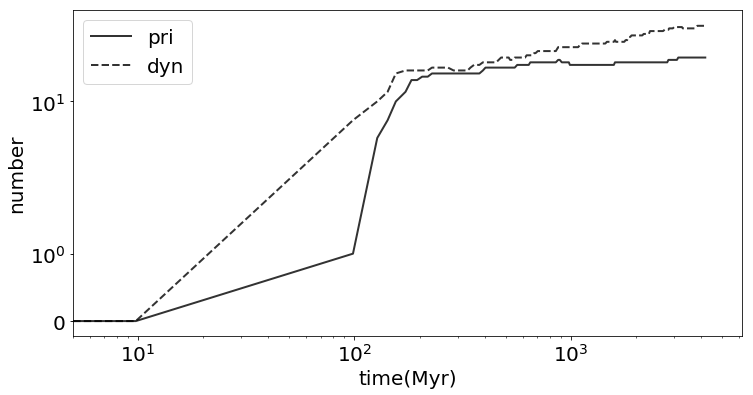

In [14]:
##Plot number of pulsars vs. time behemoth(primordial and dynamical)

nsfile = '/projects/b1095/syr904/projects/GCE/behemoth/ns_pridyn.dat'

datans = np.genfromtxt(nsfile)
times = np.array(datans[:,0])
n_pri = np.array(datans[:,3])+np.array(datans[:,6])
n_dyn = np.array(datans[:,4])+np.array(datans[:,7])
    
    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(figsize = (12,6))
axs.plot(times, n_pri, label = 'pri', color = 'k', lw = 2, alpha=0.8)
axs.plot(times, n_dyn, label = 'dyn', color = 'k', ls = '--', lw = 2, alpha=0.8)
     
axs.set_xscale('log')
axs.set_yscale('symlog')
axs.set_xlim(xmin = 5)
axs.set_xlabel('time(Myr)')
axs.set_ylabel('number')
axs.legend(loc='best')

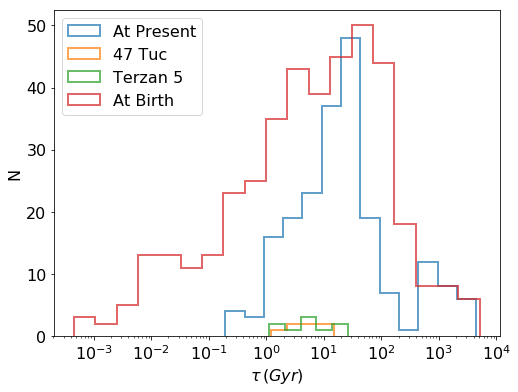

In [22]:
##Characteristic spin-down time-scale for all catalog msps at last time step and at birth
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_maingrid_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_catalog_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
status_last=np.array(msp_last[:,2]); index_last=np.where(status_last==1)
Pdot_last=Kconst*yearsc*B_last*B_last/P_last
#print(Pdot_last)

B_birth=np.array(msp_birth[:,8]); P_birth=np.array(msp_birth[:,9])
status_birth=np.array(msp_birth[:,12]); index_birth=np.where(status_birth==1)
Pdot_birth=Kconst*yearsc*B_birth*B_birth/P_birth
#print(Pdot_birth)

tau_last_all=(0.5*P_last/Pdot_last)/yearsc/10**9
tau_birth_all=(0.5*P_birth/Pdot_birth)/yearsc/10**9

##Extract model data from non-disrupted models
tau_last=tau_last_all[index_last]
tau_birth=tau_birth_all[index_birth]

##47 Tuc and Terzan 5 data
data47tuc=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/47tuc_pulsars.dat')
datater5=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Terzan5_pulsars.dat')
P47=np.array(data47tuc[:,1]); Pdot47=np.array(data47tuc[:,2]); Pdoterr47=np.array(data47tuc[:,3])
P5=np.array(datater5[:,2]); Pdot5=np.array(datater5[:,3])
tau47 = P47*0.001/(Pdot47*10**(-21))/yearsc/10**9
tau5 = P5*0.001/(Pdot5*10**(-21))/yearsc/10**9

#weights = np.ones_like(tau)/float(len(tau))

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(tau_last, bins=np.logspace(np.log10(min(tau_last)), np.log10(max(tau_last)), 14), histtype='step', lw = 2, alpha=0.7, label='At Present')
ax.hist(tau47, bins=np.logspace(np.log10(min(tau47)), np.log10(max(tau47)), 5), histtype='step', lw = 2, alpha=0.7, label='47 Tuc')
ax.hist(tau5, bins=np.logspace(np.log10(min(tau5)), np.log10(max(tau5)), 6), histtype='step', lw = 2, alpha=0.7, label='Terzan 5')
ax.hist(tau_birth, bins=np.logspace(np.log10(min(tau_birth)), np.log10(max(tau_birth)), 20), histtype='step', lw = 2, alpha=0.7, label='At Birth')

ax.set_xscale('log')
ax.set_xlabel(r'$\tau\,(Gyr)$')
ax.set_ylabel('N')
ax.legend(loc='best')

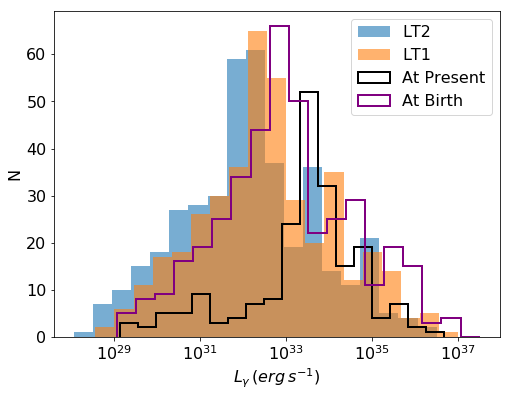

In [24]:
##L_gamma distribution at birth and at present
Cscale=9.6*10**33  ##in erg/s
eta_gamma = 0.1

##L_gamma evolution function
def L_T_2(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -2)
    return Lt
    
def L_T_1(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -1)
    return Lt
    

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_maingrid_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_catalog_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
status_last=np.array(msp_last[:,2]); index_last=np.where(status_last==1)

B_birth=np.array(msp_birth[:,8]); P_birth=np.array(msp_birth[:,9]); T_birth_all = np.array(msp_birth[:,1])
status_birth=np.array(msp_birth[:,12]); index_birth=np.where(status_birth==1)

Llast_all = Cscale*(eta_gamma/0.2)*(B_last/10**8.5)**2*(3./(P_last*1000.))**4
Lbirth_all = Cscale*(eta_gamma/0.2)*(B_birth/10**8.5)**2*(3./(P_birth*1000.))**4

Llast=Llast_all[index_last]
Lbirth=Lbirth_all[index_birth]
T_birth=T_birth_all[index_birth]

Lpresent_2 = L_T_2(Lbirth, 3000, 14000.-T_birth)
Lpresent_1 = L_T_1(Lbirth, 3000, 14000.-T_birth)

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(Lpresent_2, bins=np.logspace(np.log10(min(Lpresent_2)), np.log10(max(Lpresent_2)), 20), histtype='stepfilled', lw = 2, alpha=0.6, label='LT2')
ax.hist(Lpresent_1, bins=np.logspace(np.log10(min(Lpresent_1)), np.log10(max(Lpresent_1)), 20), histtype='stepfilled', lw = 2, alpha=0.6, label='LT1')
ax.hist(Llast, bins=np.logspace(np.log10(min(Llast)), np.log10(max(Llast)), 19), histtype='step', lw = 2, color = 'k', alpha=1, label='At Present')
ax.hist(Lbirth, bins=np.logspace(np.log10(min(Lbirth)), np.log10(max(Lbirth)), 20), histtype='step', lw = 2, color = 'purple', alpha=1, label='At Birth')

ax.set_xscale('log')
ax.set_xlabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
ax.set_ylabel('N')
ax.legend(loc='best')

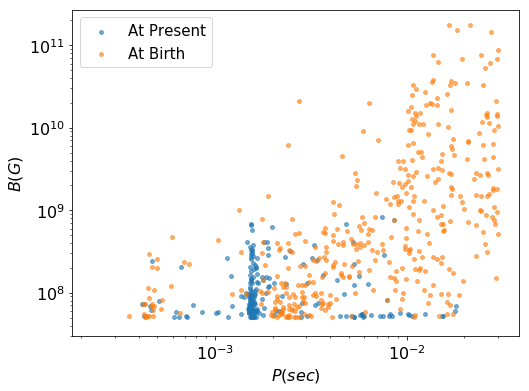

In [33]:
##Distribution of spin period and magnetic field at birth and at present
###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_maingrid_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/msp_catalog_atbirth.dat')

B_last_all=np.array(msp_last[:,4]); P_last_all=np.array(msp_last[:,5])
status_last=np.array(msp_last[:,2]); index_last=np.where(status_last==1)[0]
Pdot_last_all=Kconst*yearsc*B_last_all*B_last_all/P_last_all
#print(Pdot_last)

B_last=B_last_all[index_last]; P_last=P_last_all[index_last]


B_birth_all=np.array(msp_birth[:,8]); P_birth_all=np.array(msp_birth[:,9])
t_evol_all = 14000.-np.array(msp_birth[:,1])
status_birth=np.array(msp_birth[:,12]); index_birth=np.where(status_birth==1)[0]
Pdot_birth_all=Kconst*yearsc*B_birth_all*B_birth_all/P_birth_all
B_presnt_all, P_presnt_all = psrevol.single_psr_evolv_itgstep(B_birth_all, P_birth_all, t_evol_all)
#print(Pdot_birth)


B_birth=B_birth_all[index_birth]; P_birth=P_birth_all[index_birth]
B_presnt=np.array(B_presnt_all)[index_birth]; P_presnt=np.array(P_presnt_all)[index_birth]


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(P_last, B_last, s=15, label = 'At Present', alpha = 0.6)
ax.scatter(P_birth, B_birth, s=15, label = 'At Birth', alpha=0.6)
#ax.scatter(P_presnt, B_presnt, s=15, color = 'k', label = 'At Birth', alpha=0.6)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(xmin = 0.0002)
ax.set_ylabel(r'$B(G)$')
ax.set_xlabel(r'$P(sec)$')
ax.legend(loc='best', fontsize=15)

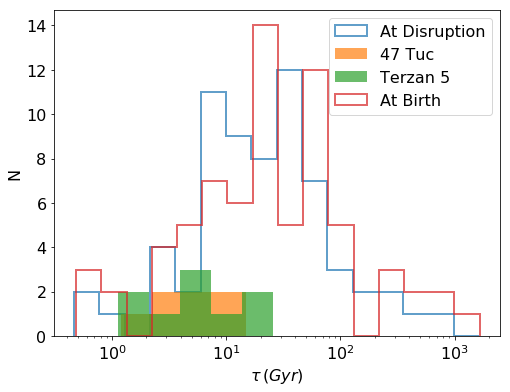

In [4]:
##Characteristic spin-down time-scale for Behemoth msps at last time step and at birth

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_behemoth_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
Pdot_last=Kconst*yearsc*B_last*B_last/P_last
#print(Pdot_last)

B_birth=np.array(msp_birth[:,7]); P_birth=np.array(msp_birth[:,8])
Pdot_birth=Kconst*yearsc*B_birth*B_birth/P_birth
#print(Pdot_birth)

tau_last=(0.5*P_last/Pdot_last)/yearsc/10**9
tau_birth=(0.5*P_birth/Pdot_birth)/yearsc/10**9


##47 Tuc and Terzan 5 data
data47tuc=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/47tuc_pulsars.dat')
datater5=np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Terzan5_pulsars.dat')
P47=np.array(data47tuc[:,1]); Pdot47=np.array(data47tuc[:,2]); Pdoterr47=np.array(data47tuc[:,3])
P5=np.array(datater5[:,2]); Pdot5=np.array(datater5[:,3])
tau47 = P47*0.001/(Pdot47*10**(-21))/yearsc/10**9
tau5 = P5*0.001/(Pdot5*10**(-21))/yearsc/10**9

#weights = np.ones_like(tau)/float(len(tau))

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(tau_last, bins=np.logspace(np.log10(min(tau_last)), np.log10(max(tau_last)), 17), histtype='step', lw = 2, alpha=0.7, label='At Disruption')
ax.hist(tau47, bins=np.logspace(np.log10(min(tau47)), np.log10(max(tau47)), 5), histtype='stepfilled', lw = 2, alpha=0.7, label='47 Tuc')
ax.hist(tau5, bins=np.logspace(np.log10(min(tau5)), np.log10(max(tau5)), 6), histtype='stepfilled', lw = 2, alpha=0.7, label='Terzan 5')
ax.hist(tau_birth, bins=np.logspace(np.log10(min(tau_birth)), np.log10(max(tau_birth)), 17), histtype='step', lw = 2, alpha=0.7, label='At Birth')

ax.set_xscale('log')
ax.set_ylabel('N')
ax.set_xlabel(r'$\tau\,(Gyr)$')
ax.legend(loc='best')

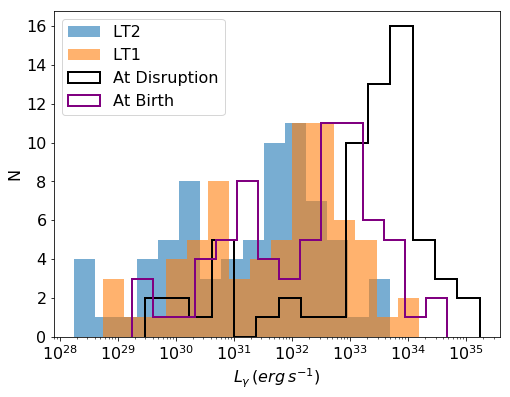

In [5]:
##L_gamma distribution at birth and at present for Behemoth
Cscale=9.6*10**33  ##in erg/s
eta_gamma = 0.1

##L_gamma evolution function
def L_T_2(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -2)
    return Lt
    
def L_T_1(L0, tau, t):
    Lt = L0*pow(1+(t/tau)**0.5, -1)
    return Lt
    

###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_behemoth_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
B_birth=np.array(msp_birth[:,7]); P_birth=np.array(msp_birth[:,8]); T_birth = np.array(msp_birth[:,0])

Llast = Cscale*(eta_gamma/0.2)*(B_last/10**8.5)**2*(3./(P_last*1000.))**4
Lbirth = Cscale*(eta_gamma/0.2)*(B_birth/10**8.5)**2*(3./(P_birth*1000.))**4

Lpresent_2 = L_T_2(Lbirth, 3000, 14000.-T_birth)
Lpresent_1 = L_T_1(Lbirth, 3000, 14000.-T_birth)

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 6))

ax.hist(Lpresent_2, bins=np.logspace(np.log10(min(Lpresent_2)), np.log10(max(Lpresent_2)), 16), histtype='stepfilled', lw = 2, alpha=0.6, label='LT2')
ax.hist(Lpresent_1, bins=np.logspace(np.log10(min(Lpresent_1)), np.log10(max(Lpresent_1)), 16), histtype='stepfilled', lw = 2, alpha=0.6, label='LT1')
ax.hist(Llast, bins=np.logspace(np.log10(min(Llast)), np.log10(max(Llast)), 16), histtype='step', lw = 2, color = 'k', alpha=1, label='At Disruption')
ax.hist(Lbirth, bins=np.logspace(np.log10(min(Lbirth)), np.log10(max(Lbirth)), 16), histtype='step', lw = 2, color = 'purple', alpha=1, label='At Birth')

ax.set_xscale('log')
ax.set_xlabel(r'$L_{\gamma}\,(erg\,s^{-1})$')
ax.set_ylabel('N')
ax.legend(loc='upper left')

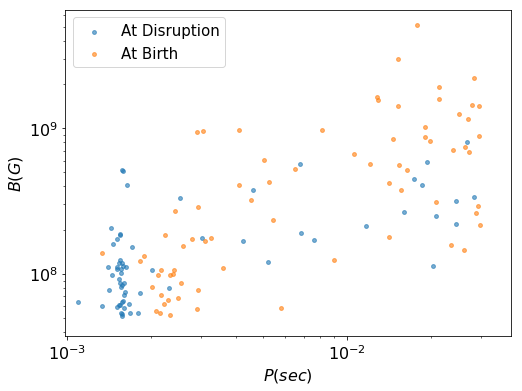

In [4]:
##Distribution of spin period and magnetic field at birth and at present
###Model Data###
msp_last=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_last.dat')
msp_birth=np.genfromtxt('/projects/b1095/syr904/projects/GCE/behemoth/msp_behemoth_atbirth.dat')

B_last=np.array(msp_last[:,4]); P_last=np.array(msp_last[:,5])
Pdot_last=Kconst*yearsc*B_last*B_last/P_last
#print(Pdot_last)

B_birth=np.array(msp_birth[:,7]); P_birth=np.array(msp_birth[:,8])
Pdot_birth=Kconst*yearsc*B_birth*B_birth/P_birth
#print(Pdot_birth)


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(P_last, B_last, s=15, label = 'At Disruption', alpha = 0.6)
ax.scatter(P_birth, B_birth, s=15, label = 'At Birth', alpha=0.6)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(xmin = 0.0002)
ax.set_ylabel(r'$B(G)$')
ax.set_xlabel(r'$P(sec)$')
ax.legend(loc='best', fontsize=15)

In [2]:
##Calculating the mass density at half-mass radius
rho_rh, m_rh, r_rh = gce.find_rh_density('/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg2/z0.0002/8e5/', 
                                        'initial.snap0649.dat.gz')
print(rho_rh)
#plt.figure()
#plt.

0.5
7.6977182
230.66296113467206


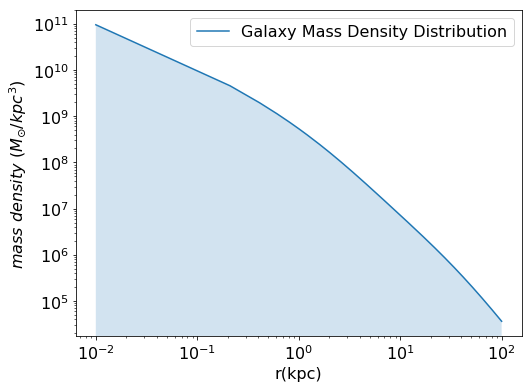

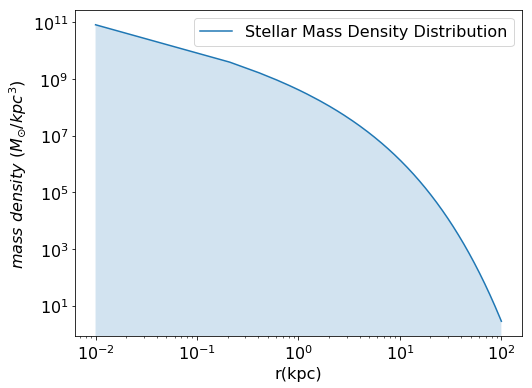

82220410517.31635


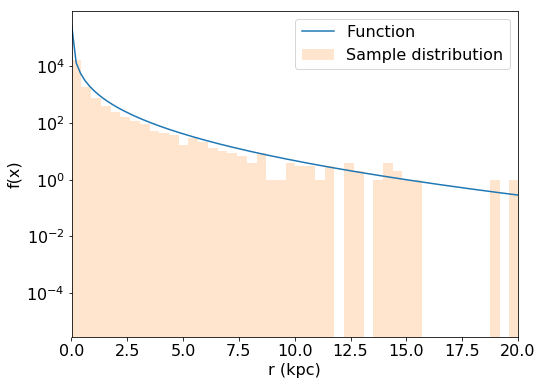

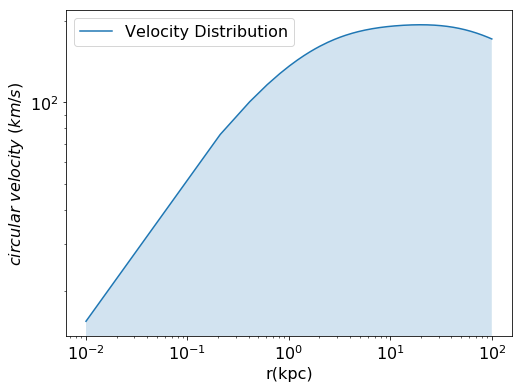

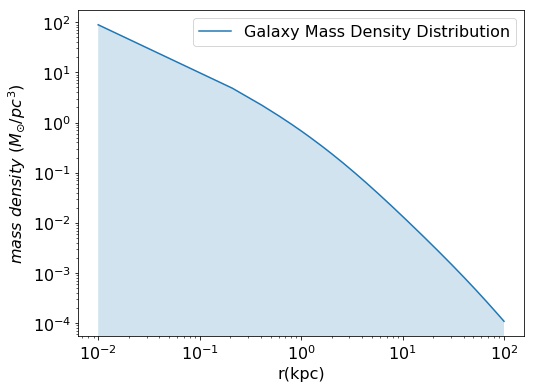

In [10]:
plt.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams.update({'font.size': 16})

xmin_sample = 0.01; xmax_sample = 100

##Plot galaxy mass density distribution with dark matter halo
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.gdf(xs[ii]))

plt.plot(xs, ys, label='Galaxy Mass Density Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0.001, xmax_sample*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ density\ (M_{\odot}/kpc^3)$')
plt.legend()
plt.show()


##Plot stellar mass density distribution
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.smdf(xs[ii]))

plt.plot(xs, ys, label='Stellar Mass Density Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0.001, xmax_sample*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ density\ (M_{\odot}/kpc^3)$')
plt.legend()
plt.show()

print(csv1.smdf(xmin_sample))
##Plot VN sampling disrtribution
samps = csv1.VN_sampling(csv1.smdf, xmin_sample, xmax_sample, csv1.smdf(xmin_sample), 20000)
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = csv1.smdf(xs)

plt.plot(xs, ys/(3*1e5), label="Function")
#plt.hist(samps, bins=np.logspace(np.log10(xmin_sample), np.log10(xmax_sample), 30),
#    density=False, alpha=0.2, label="Sample distribution")
plt.hist(samps, bins=50,
    density=False, alpha=0.2, label="Sample distribution")
#bins = np.logspace(np.log10(xmin_sample), np.log10(xmax_sample), 10),
plt.xlim(xmin_sample/2, 20.)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("r (kpc)")
plt.ylabel("f(x)") 
plt.legend()
plt.show()


##Plot velocity distribution
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.circ_vel(xs[ii], csv1.gdf))

plt.plot(xs, ys, label='Velocity Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0, 30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$circular\ velocity\ (km/s)$')
plt.legend()
plt.show()


##Plot galaxy_rho_r
xs = np.linspace(xmin_sample, xmax_sample, 500)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.galaxy_rho_r(xs[ii], csv1.circ_vel))

plt.plot(xs, ys, label='Galaxy Mass Density Distribution') 
plt.fill_between(xs, ys, 0, alpha=0.2)
#plt.xlim(0, 30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("r(kpc)")
plt.ylabel(r'$mass\ density\ (M_{\odot}/pc^3)$')
plt.legend()
plt.show()

Counter({11: 49, 17: 42, 8: 42, 7: 41, 12: 41, 13: 40, 4: 39, 10: 39, 6: 39, 9: 39, 14: 37, 15: 36, 16: 35, 5: 32, 18: 31, 2: 26, 20: 26, 19: 26, 3: 25, 21: 23, 25: 22, 23: 19, 22: 19, 1: 15, 24: 15}) 15


Text(0.5,0,'$metallicty$')

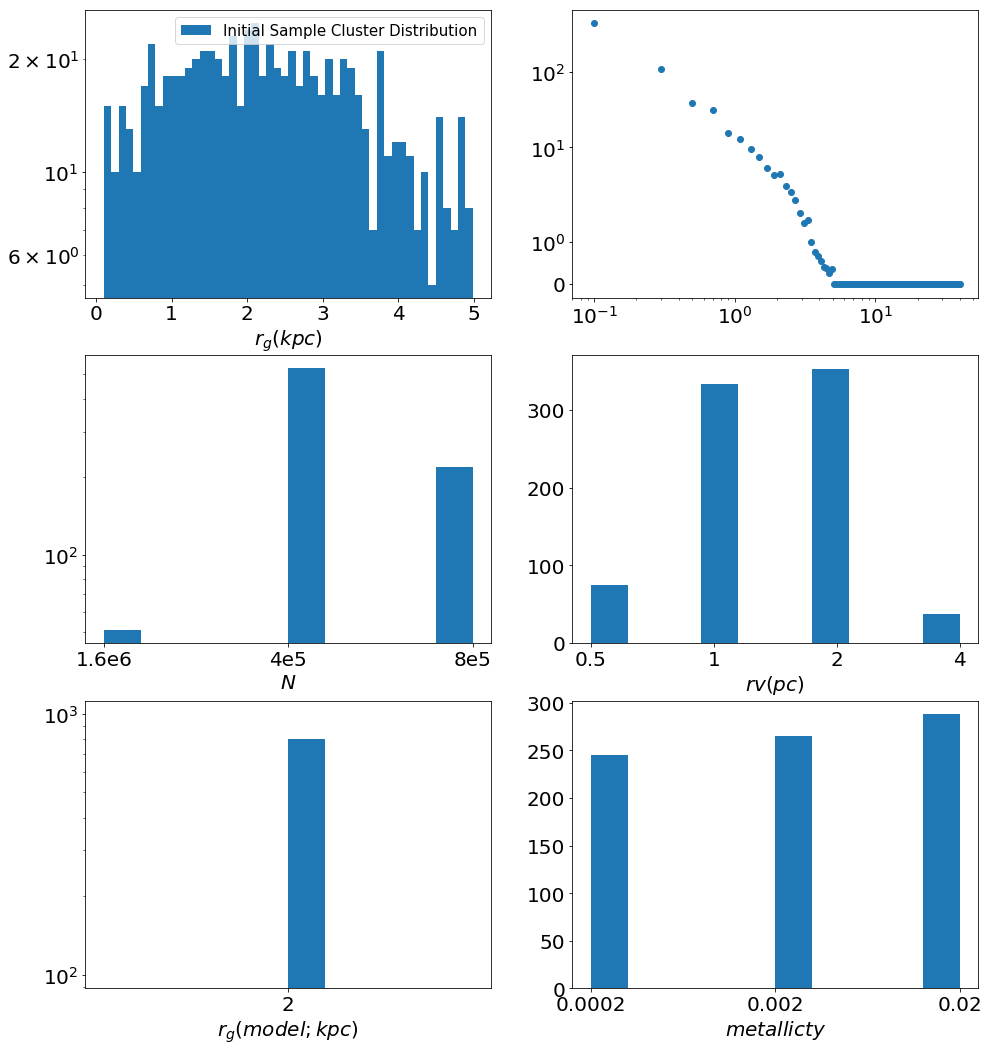

In [2]:
##Plot the sampling of the initial distribution of clusters in the galaxy
sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_initial_M_RG_dissol1_fcl0.024_ffa0.012_xcut5.0.dat', 
                            dtype = str)
nstar_init = sample_init[:,0]; rv_init = sample_init[:,1]
rg_model_init = sample_init[:,2]; z_init = sample_init[:,3]
rg_init = sample_init[:,5].astype(np.float)

rg_bins = np.linspace(0, 40, 201)
bin_indices = np.digitize(rg_init, rg_bins)
allbin = Counter(bin_indices)
print(allbin, allbin[1])
x_density = []; y_density = []
for ii in range(len(rg_bins)-1):
    vol = (2.*twopi/3.)*(rg_bins[ii+1]**3-rg_bins[ii]**3)
    x_density.append((rg_bins[ii+1]+rg_bins[ii])/2.)
    y_density.append(allbin[ii+1]/vol)


    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (16,18))
#axs[0][0].hist(rg_init, bins = np.logspace(np.log10(min(rg_init)), np.log10(max(rg_init)), 50))
axs[0][0].hist(rg_init, bins = 50, label = 'Initial Sample Cluster Distribution')
#axs.set_xscale('log')
axs[0][0].set_yscale('log')
#axs[0][0].set_xscale('log')
axs[0][0].set_xlabel(r'$r_g(kpc)$')
axs[0][0].legend(fontsize=15)


axs[0][1].scatter(x_density, y_density)
axs[0][1].set_yscale('symlog')
axs[0][1].set_xscale('log')
axs[0][1].set_xlim(xmin = 0.07)


axs[1][0].hist(nstar_init)
axs[1][0].set_xlabel(r'$N$')
axs[1][0].set_yscale('log')

axs[1][1].hist(rv_init)
axs[1][1].set_xlabel(r'$rv(pc)$')

axs[2][0].hist(rg_model_init)
axs[2][0].set_xlabel(r'$r_g(model; kpc)$')
axs[2][0].set_yscale('log')

axs[2][1].hist(z_init)
axs[2][1].set_xlabel(r'$metallicty$')


[  0   0   0   1   0   1   1   1   0   0   1   0   0   1   0   0   3   1
   0   1   1   1   0   1   2   2   1  13  13  16   9  13  10   9   6   8
  26  36  28  24  10  12  16  32  46  65  63  61  30  38  36  45 100 120
 165 147 117  72  92 105 128 153 169 241 271 148 156 134  91  96  62  82
 110 140 127 176 131 104  82  70  68  72  74  61  51  41  37  22  24  18
  17  16  17   5   6   2   3   0   2   4]
[0.0, 0.0, 0.0, 12303.456145121241, 0.0, 8166.955943927962, 6653.907458050853, 5421.173416910934, 0.0, 0.0, 2931.8579921524124, 0.0, 0.0, 1585.5960739669608, 0.0, 0.0, 2572.547766476629, 698.6485085783385, 0.0, 463.75843686108044, 377.84037809806136, 307.8399010648098, 0.0, 204.34216858458657, 332.96956390469427, 271.28206393921056, 110.51153948140266, 1170.489507162706, 953.6391422645986, 956.2627581487451, 438.2443369804158, 515.7434241369494, 323.226448693103, 237.00960347136814, 128.73339662866783, 139.84485999577657, 370.2937766133513, 417.72657917785574, 264.7062427598728, 184.856

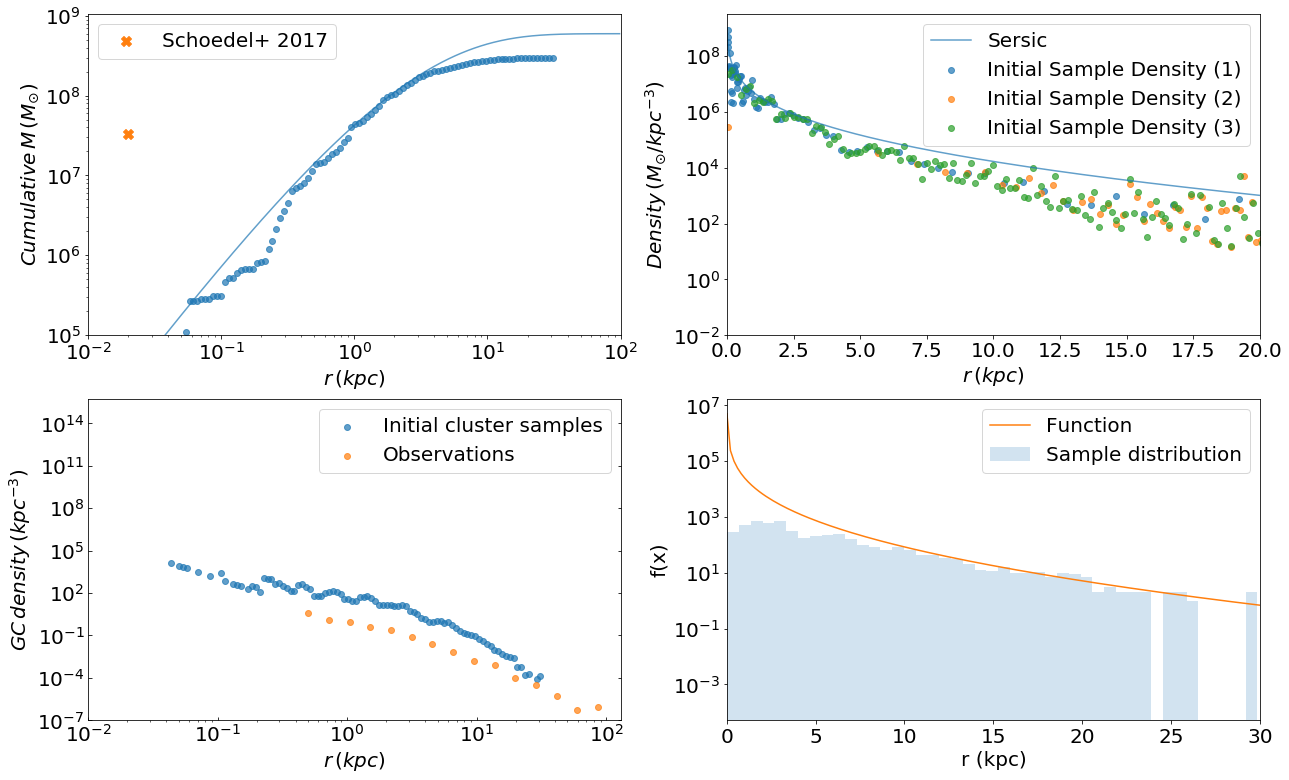

In [2]:
##Cumulative mass of initial clusters as a function of the galactocentric radius
##Inital cluster number density distribution
#sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_initial_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive.dat', 
#                            dtype = str)
#Mgc_init = sample_init[:,8].astype(np.float)
#Rg_init = sample_init[:,5].astype(np.float)
#print(Mgc)


######For analytical models######
sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/cluster_analytical_initial_M_RG_fcl0.012_ffa0.006_xcut2.9_xmin0.005.dat', 
                            dtype = str)
Mgc_init = sample_init[:,0].astype(np.float)
Rg_init = sample_init[:,1].astype(np.float)
############


logbin_init = np.logspace(np.log10(min(Rg_init)), np.log10(max(Rg_init)), 101)
ngc_init, rgc_init= np.histogram(Rg_init, bins = logbin_init)
print(ngc_init)


mgc_init = np.zeros(100)

for jj in range(len(rgc_init)-1):
    for xx in range(len(Rg_init)):
        if rgc_init[jj]<=Rg_init[xx]<rgc_init[jj+1]:
            mgc_init[jj]+=Mgc_init[xx]
    
cumul_mgc_init = np.cumsum(mgc_init)


#####Density (1); Binned evenly in logscale
density_init = []; rkpc_init = []; density_init_err = []
mass_density_init = []
for xx in range(len(ngc_init)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol_init = (2.*twopi/3.)*(rgc_init[xx+1]**3-rgc_init[xx]**3)
    density_init.append(ngc_init[xx]/vol_init)
    density_init_err.append(math.sqrt(ngc_init[xx])/vol_init)
    mass_density_init.append(mgc_init[xx]/vol_init)
    rkpc_init.append(rgc_init[xx])
print(density_init)
    
    
#####Density (2); Binned with equal volumn
volbin_init = np.linspace((2*twopi/3.)*min(Rg_init)**3, (2*twopi/3.)*max(Rg_init)**3, 201)
#print(volbin_init)
vol_diff = volbin_init[1]-volbin_init[0]
vol2rg_bin = (volbin_init*(3./2/twopi))**(1./3.)
#print(min(Rg_init), max(Rg_init))
#print(vol2rg_bin)
mden_init = []
m_equalvol = np.zeros(200)
for kk in range(len(vol2rg_bin)-1):
    for zz in range(len(Rg_init)):
        if vol2rg_bin[kk]<=Rg_init[zz]<vol2rg_bin[kk+1]:
            m_equalvol[kk]+=Mgc_init[zz]
    
for zz in range(len(volbin_init)-1):
    mden_init.append(m_equalvol[zz]/vol_diff)
    
#print(mden_init)
#####Density (3); Binned evenly in linear scale
linbin_init = np.linspace(min(Rg_init), max(Rg_init), 201)
ngc_init_lin, rgc_init_lin= np.histogram(Rg_init, bins = linbin_init)

m_lin = np.zeros(200)
for kk in range(len(rgc_init_lin)-1):
    for zz in range(len(Rg_init)):
        if rgc_init_lin[kk]<=Rg_init[zz]<rgc_init_lin[kk+1]:
            m_lin[kk]+=Mgc_init[zz]

mden_init_lin = []
for xx in range(len(rgc_init_lin)-1):
    vol_init_lin = (2.*twopi/3.)*(rgc_init_lin[xx+1]**3-rgc_init_lin[xx]**3)
    mden_init_lin.append(m_lin[xx]/vol_init_lin)

    
    
##########################################################    
##Observed cluster position
f_gc = 0.012
x_min = 0.01; x_max = 100.

data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
#print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
#print(ngc_hist, rgc_hist)

density = []; rkpc = []; density_err = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    density_err.append(math.sqrt(ngc_hist[xx])/vol)
    rkpc.append(rgc_hist[xx])
#print(density_err)

##Galaxy cumulative mass
rg_bin = np.logspace(np.log10(x_min), np.log10(x_max), 500)
#print(rg_bin)
M_bin = []
for ii in range(len(rg_bin)-1):
    rg_med = (rg_bin[ii+1]+rg_bin[ii])/2.
    Mr = 2*twopi*integrate.quad(lambda x: csv1.smdf(x)*x*x, 0., rg_med)[0]
    M_bin.append(Mr)
    
M_bin = f_gc*np.array(M_bin)
#################################################################
##Plotting
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(21,13))
#axs.scatter(rgc_disrp[:-1], cumul_nmsp)
axs[0][0].scatter(rgc_init[:-1], cumul_mgc_init, alpha=0.7)
axs[0][0].plot(rg_bin[:-1], M_bin, alpha=0.7)
axs[0][0].scatter(0.02, 3.3e7, marker = 'X', s=100, label = 'Schoedel+ 2017')
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_xlim(xmin = 0.01, xmax = 100.)
axs[0][0].set_ylim(ymin = 1e5)
axs[0][0].set_xlabel(r'$r\,(kpc)$')
axs[0][0].set_ylabel(r'$Cumulative\,M\,(M_{\odot})$')
axs[0][0].legend(loc = 'best')

xs = np.linspace(x_min, x_max, 5000)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.smdf(xs[ii])*f_gc)
axs[0][1].scatter(rgc_init[:-1], mass_density_init, alpha=0.7, label = 'Initial Sample Density (1)')
axs[0][1].scatter(vol2rg_bin[:-1], mden_init, alpha=0.7, label = 'Initial Sample Density (2)')
axs[0][1].scatter(rgc_init_lin[:-1], mden_init_lin, alpha=0.7, label = 'Initial Sample Density (3)')
axs[0][1].plot(xs, ys, alpha=0.7, label = 'Sersic')
#axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
axs[0][1].set_xlim(xmin = 0.01, xmax = 20.)
#axs[0][1].set_ylim(ymin = 1e5)
axs[0][1].set_xlabel(r'$r\,(kpc)$')
axs[0][1].set_ylabel(r'$Density\,(M_{\odot}/kpc^{-3})$')
axs[0][1].legend(loc = 'upper right')

axs[1][0].scatter(rkpc_init, density_init, label = 'Initial cluster samples', alpha=0.7)
axs[1][0].scatter(rkpc, density, label = 'Observations', alpha=0.7)
axs[1][0].set_yscale('log')
axs[1][0].set_xscale('log')
axs[1][0].set_ylim(ymin = 0.0000001, ymax = 5e15)
axs[1][0].set_xlim(xmin = 0.01)
axs[1][0].set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs[1][0].set_xlabel(r'$r\,(kpc)$')
axs[1][0].legend(loc='best')
axs[1][0].tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)


xs = np.linspace(x_min, x_max, 500)
ys = csv1.smdf(xs)
axs[1][1].hist(Rg_init, bins=50,
    density=False, alpha=0.2, label="Sample distribution")
axs[1][1].plot(xs, ys*f_gc/(2*1e2), label="Function")
axs[1][1].set_xlim(0.05/2, 30.)
axs[1][1].set_yscale('log')
axs[1][1].set_xlabel("r (kpc)")
axs[1][1].set_ylabel("f(x)") 
axs[1][1].legend()


0.5 124.6
[1.89549642467853, 0.6286564300645336, 0.3127483401572573, 0.1197718545289387, 0.05128254164404141, 0.017428282194236602, 0.00549809359722783, 0.0016733458542389354, 0.0004601638052658687, 0.00020057800436740493, 4.037810359693125e-05, 1.2398322120172697e-05, 2.9076244363729694e-06, 5.567600628079161e-07, 4.1289865647150634e-07]
5115
3868
200
[10.432192765013276, 0.0, 0.0, 1.4584496386803958, 0.0, 0.31181140387809125, 0.24971975527117904, 0.18256738023910282, 0.08718420749424283, 0.04155301800897991, 0.024213650655087515, 0.00987389071878115, 0.004777963916471041, 0.002209241253593707, 0.0007679822475550887, 0.00036850535350377745, 0.0001510345844217736, 5.5709512882056234e-05, 9.736001222075344e-06, 0.0]


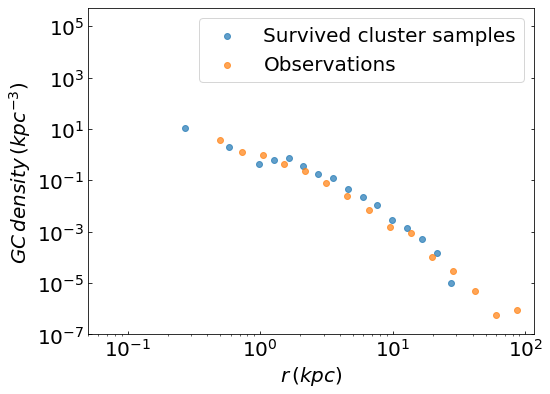

In [43]:
##Observed cluster position
data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
#print(ngc_hist, rgc_hist)

density = []; rkpc = []; density_err = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    density_err.append(math.sqrt(ngc_hist[xx])/vol)
    rkpc.append(rgc_hist[xx])
print(density_err)
    
##Disrputed cluster sample
sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_dissol0_fcl0.024_ffa0.012_xcut4.997654049537297.dat', 
                             dtype = str)
nstar_disrp = sample_disrp[:,0]; rv_disrp = sample_disrp[:,1]
rg_model_disrp = sample_disrp[:,2]; z_disrp = sample_disrp[:,3]
rg_init = sample_disrp[:,5].astype(np.float)
rg_disrp = sample_disrp[:,6].astype(np.float)
type_disrp = sample_disrp[:,9].astype(np.int)

sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_property_M_RG_dissol0_fcl0.024_ffa0.012_xcut4.997654049537297.dat', dtype = str)
m_disrp = sample_prop[:,6].astype(np.float)

print(len(rg_disrp))
rg_disrp = rg_disrp[type_disrp==4]
m_disrp = m_disrp[type_disrp==4]
print(len(rg_disrp))
rg_disrp = rg_disrp[m_disrp>1.5e5]
print(len(rg_disrp))


######For analytical models######
#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/semi_analytic_model_fcl0.012_ffa0.006_xcut2.9_xmin0.005.txt', 
#                             dtype = str)
#rg_init = sample_disrp[:,1].astype(np.float)
#rg_disrp = sample_disrp[:,8].astype(np.float)
#type_disrp = sample_disrp[:,12].astype(np.int)
#m_disrp = sample_disrp[:,11].astype(np.float)

#print(len(rg_disrp))
#rg_disrp = rg_disrp[type_disrp==4]
#m_disrp = m_disrp[type_disrp==4]
#print(len(rg_disrp))
#rg_disrp = rg_disrp[m_disrp>1e5]
#print(len(rg_disrp))

############

logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 21)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)
#print(ngc_disrp)

density_disrp = []; rkpc_disrp = []; density_disrp_err = []
for xx in range(len(ngc_disrp)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol_disrp = (2.*twopi/3.)*(rgc_disrp[xx+1]**3-rgc_disrp[xx]**3)
    density_disrp.append(ngc_disrp[xx]/vol_disrp)
    density_disrp_err.append(math.sqrt(ngc_disrp[xx])/vol_disrp)
    rkpc_disrp.append(rgc_disrp[xx])
print(density_disrp_err)
    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(figsize = (8, 6))
axs.scatter(rkpc_disrp, density_disrp, label = 'Survived cluster samples', alpha=0.7)
axs.scatter(rkpc, density, label = 'Observations', alpha=0.7)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(ymin = 0.0000001, ymax = 5e5)
axs.set_xlim(xmin = 0.05)
axs.set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs.set_xlabel(r'$r\,(kpc)$')
axs.legend(loc='best')
axs.tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)

4.156087249896137
[4.4758630e+00 1.0000000e-03 1.0000000e-03 ... 1.7822626e+01 1.2024246e+01
 9.4089190e+00]


Text(0,0.5,'$Cumulative\\,N_{MSP}$')

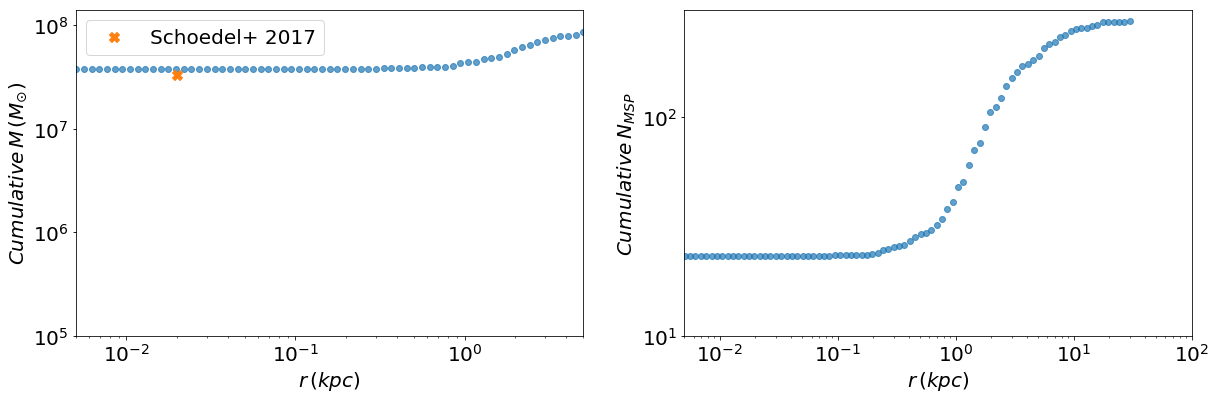

In [24]:
##Cumulative mass, nmsp, Lmsp of disrupted clusters as a function of the galactocentric radius
#sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_property_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_fastdf.dat', dtype = str)
#Nmsp = sample_prop[:,5].astype(np.float)
#Mgc = sample_prop[:,6].astype(np.float)
#Lmsp = sample_prop[:,7].astype(np.float)
#Lmsp[Lmsp < 0] = 0
##print(sum(Nmsp), sum(Mgc))
##print(Mgc)

#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive_fastdf.dat', dtype = str)
#rg_disrp = sample_disrp[:,6].astype(np.float)
#status_disrp = sample_disrp[:,9].astype(np.int)

######For analytical models######
sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/semi_analytic_model_fcl0.012_ffa0.006_xcut2.9_xmin0.005.txt', dtype = str)
Nmsp = sample_prop[:,14].astype(np.float)
Mgc = sample_prop[:,11].astype(np.float)
Lmsp = sample_prop[:,13].astype(np.float)
Lmsp[Lmsp < 0] = 0.
#print(sum(Nmsp), sum(Mgc))
#print(Mgc)
rg_disrp = sample_prop[:,8].astype(np.float)
status_disrp = sample_disrp[:,12].astype(np.int)
rg_disrp[rg_disrp < 0] = 0.001
############


print(np.mean(rg_disrp))
print(rg_disrp)

#rg_disrp = rg_disrp[status_disrp!=4]
#Nmsp = Nmsp[status_disrp!=4]; Mgc = Mgc[status_disrp!=4]; Lmsp = Lmsp[status_disrp!=4]
    
logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 101)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)

mgc_disrp = np.zeros(100); mgc_disrp_old = np.zeros(100)
nmsp_disrp = np.zeros(100); nmsp_disrp_old = np.zeros(100)
lmsp_disrp = np.zeros(100); lmsp_disrp_old = np.zeros(100)
for jj in range(len(rgc_disrp)-1):
    for xx in range(len(rg_disrp)):
        if rgc_disrp[jj]<=rg_disrp[xx]<rgc_disrp[jj+1]:
            nmsp_disrp[jj]+=Nmsp[xx]; mgc_disrp[jj]+=Mgc[xx]; lmsp_disrp[jj]+=Lmsp[xx]
            #nmsp_disrp_old[jj]+=prop_right[0][xx]; mgc_disrp_old[jj]+=prop_right[1][xx]; lmsp_disrp_old[jj]+=prop_right[2][xx]
            

cumul_nmsp = np.cumsum(nmsp_disrp)
cumul_mgc = np.cumsum(mgc_disrp)
cumul_lmsp = np.cumsum(lmsp_disrp)
#cumul_right[yy] = np.cumsum(prop_right[yy])


matplotlib.rcParams.update({'font.size': 20})
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,6))
#axs.scatter(rgc_disrp[:-1], cumul_nmsp)
ax1.scatter(rgc_disrp[:-1], cumul_mgc, alpha=0.7)
ax1.scatter(0.02, 3.3e7, marker = 'X', s=100, label = 'Schoedel+ 2017')
ax1.set_xscale('log')
ax1.set_yscale('symlog')
ax1.set_xlim(xmin = 0.005, xmax = 5.)
ax1.set_ylim(ymin = 1e5)
ax1.set_xlabel(r'$r\,(kpc)$')
ax1.set_ylabel(r'$Cumulative\,M\,(M_{\odot})$')
ax1.legend(loc = 'best')

#ax2_right = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax2.scatter(rgc_disrp[:-1], cumul_nmsp, alpha=0.7)
ax2.set_xscale('log')
ax2.set_yscale('symlog')
ax2.set_xlim(xmin = 0.005, xmax = 100.)
ax2.set_ylim(ymin = 10.)
ax2.set_xlabel(r'$r\,(kpc)$')
ax2.set_ylabel(r'$Cumulative\,N_{MSP}$')

#ax2_right.scatter(rgc_disrp[:-1], cumul_lmsp, color = 'r')
#ax2_right.set_xscale('log')
#ax2_right.set_yscale('log')

1.7355774059029545e+38
1.5583526459529545e+38


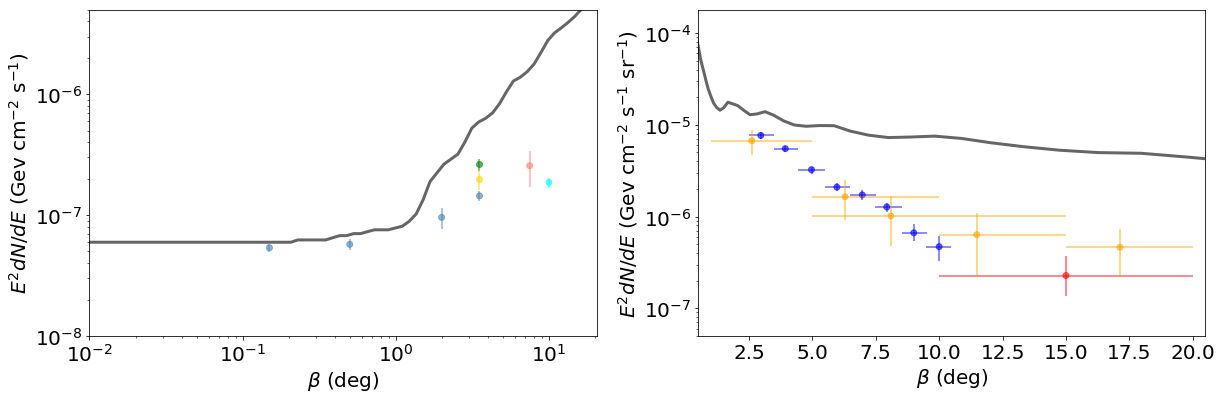

In [35]:
##Plotting Gamma-ray flux distribution
d_gc = 8.3
erg_gev = 624.151

##Read Observations
obser_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdE.xlsx',
                         names = ['deg', 'dnde_up', 'dnde_down', 'ref'])
obser_sr_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdEsr.xlsx',
                         names = ['deg', 'dnde_sr', 'deg_left', 'deg_right', 'dndesr_up', 'dndesr_down', 'ref'])
deg = obser_data['deg']; dnde = (obser_data['dnde_up']+obser_data['dnde_down'])/2.
dnde_err_up = obser_data['dnde_up'] - dnde
dnde_err_down = dnde - obser_data['dnde_down']

deg_sr = obser_sr_data['deg']; dnde_sr = obser_sr_data['dnde_sr']
dnde_sr_err_up = obser_sr_data['dndesr_up'] - dnde_sr
dnde_sr_err_down = dnde_sr - obser_sr_data['dndesr_down']
deg_err_left = deg_sr - obser_sr_data['deg_left']
deg_err_right = obser_sr_data['deg_right'] - deg_sr



######################################################
##Read model data
#sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_property_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive.dat', dtype = str)
#Lmsp = sample_prop[:,7].astype(np.float)
#Lmsp[Lmsp < 0] = 0

#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_dissol0_fcl0.012_ffa0.006_xcut3.0_xmin0.01_massive.dat', dtype = str)
#rg_disrp = sample_disrp[:,6].astype(np.float)
#status_disrp = sample_disrp[:,9].astype(np.int)

######For analytical models######
sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/semi_analytic_model_fcl0.012_ffa0.006_xcut2.9_xmin0.005.txt', dtype = str)
Nmsp = sample_prop[:,14].astype(np.float)
Lmsp = sample_prop[:,13].astype(np.float)
print(np.sum(Lmsp))
Lmsp[Nmsp <=0.03] = 3.5e34
Lmsp[Nmsp == 0] = 0
print(np.sum(Lmsp))
rg_disrp = sample_prop[:,8].astype(np.float)
status_disrp = sample_prop[:,12].astype(np.int)
rg_disrp[rg_disrp < 0] = 0.001
############


#print(len(status_disrp), len(Lmsp[status_disrp==4]))
#Lmsp = Lmsp[status_disrp!=4]
#rg_disrp = rg_disrp[status_disrp!=4]


logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 101)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)

lmsp_disrp = np.zeros(100); lmsp_disrp_old = np.zeros(100)
for jj in range(len(rgc_disrp)-1):
    for xx in range(len(rg_disrp)):
        if rgc_disrp[jj]<=rg_disrp[xx]<rgc_disrp[jj+1]:
            lmsp_disrp[jj]+=Lmsp[xx]
            

cumul_lmsp = np.cumsum(lmsp_disrp)

##Convert into Gev/cm^2/s and Gev/cm^2/s/sr
deg_model = np.arctan(rgc_disrp[:-1]/d_gc)*180/np.pi
cumu_lgev = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)
cumu_lgev_sr = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)/(2*twopi*np.arctan(rgc_disrp[:-1]/d_gc)**2)
#print(cumu_lgev)


######################################################
cs_dnde = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'g', 'gold', 'salmon', 'cyan']
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, figsize = (20, 6))
axs[0].set_xlabel(r'$\beta$ (deg)')
axs[0].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim(0.01,20.5)
axs[0].set_ylim(1e-8,5.*10**(-6))
axs[0].errorbar(deg, dnde, yerr = [dnde_err_down, dnde_err_up], fmt = 'o', markersize = 0.01,
                ecolor = cs_dnde, alpha=0.6)
axs[0].scatter(deg, dnde, color = cs_dnde, alpha=0.6)

axs[0].plot(deg_model, cumu_lgev, color = 'k', lw = 3, alpha=0.6)



cs_dndesr = ['r', 'orange', 'orange', 'orange', 'orange', 'orange', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
axs[1].set_xlabel(r'$\beta$ (deg)')
axs[1].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
axs[1].set_yscale('log')
#axs[1].set_xscale('log')
axs[1].set_xlim(0.5,20.5)
axs[1].set_ylim(5*1e-8,1.8*10**(-4))
axs[1].errorbar(deg_sr, dnde_sr, xerr = [deg_err_left, deg_err_right], yerr = [dnde_sr_err_down, dnde_sr_err_up], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_dndesr, alpha=0.6)
axs[1].scatter(deg_sr, dnde_sr, color = cs_dndesr, alpha=0.6)
axs[1].plot(deg_model, cumu_lgev_sr, color = 'k', lw = 3, alpha=0.6)


#plot1, =  pl.plot(np.arctan(t11/8.3)*180/3.14,t12/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2,“-”, c=‘k’,linewidth=2)
#plot2, =  pl.plot(np.arctan(t11/8.3)*180/3.14,t12*0.072/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2,“--“, c=‘k’,linewidth=2)
#plot3, =  pl.plot(np.arctan(t11/8.3)*180/3.14,t12*0.15/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2,“-.“, c=‘k’,linewidth=2)
#xx=np.arctan(t11/8.3)*180/3.14
#yy11=t12*0.945/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#yy12=t12*1.06/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#pl.fill_between(xx, yy11, yy12, color=‘cyan’,alpha=0.8)
#yy21=t12*0.0572/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#yy22=t12*0.0938/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#pl.fill_between(xx, yy21, yy22, color=‘orange’,alpha=0.8)
#yy31=t12*0.101/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#yy32=t12*0.213/(4*3.1415*8.3**2)/(4*3.1415*np.arctan(t11/8.3)**2)*624.151/(3.086*10**21)**2
#pl.fill_between(xx, yy31, yy32, color=‘yellow’,alpha=0.8)
#pl.xticks(np.arange(5,21,5))
#pl.legend([plot01,plot02,plot00], [‘Hooper+ 2013’,‘Calore+ 2015’,‘Daylan+ 2016’],loc=‘upper right’,fontsize = ‘large’,frameon=False)


[  1   0   0   0   1   1   0   1   0   0   1   0   0   0   1   0   1   1
   4   1   3   0   0   0   2   9   7   4   8   8  13   7   6   4   4   1
   2   2   3   2   8  26  48  42  35  38  29  58  41  59  62  62  59 107
 160 164 125 127 138 155 128 198 182 145 123 112  95 103  93  80  75  51
  58  35  37  26  26  16  19  17  13   3  15   9   1   3   1   1   1   1
   0   0   0   0   0   0   0   0   0   1]
[310349.7427851774, 0.0, 0.0, 0.0, 114973.14361630705, 89697.97944649846, 0.0, 54595.288878709864, 0.0, 0.0, 25924.71140649116, 0.0, 0.0, 0.0, 9604.150275751945, 0.0, 5845.631774258353, 4560.555119629285, 14231.935094349008, 2775.8130756106057, 6496.773499584359, 0.0, 0.0, 0.0, 1604.543454548888, 5633.136189556779, 3418.157230077482, 1523.8430587213336, 2377.696896190445, 1854.9950068012508, 2351.7024105354126, 987.9234769677873, 660.6368131686623, 343.6036476307344, 268.06741081881626, 52.28417774273166, 81.58053181872738, 63.64624499379837, 74.48182326412646, 38.738722465361015, 120.8

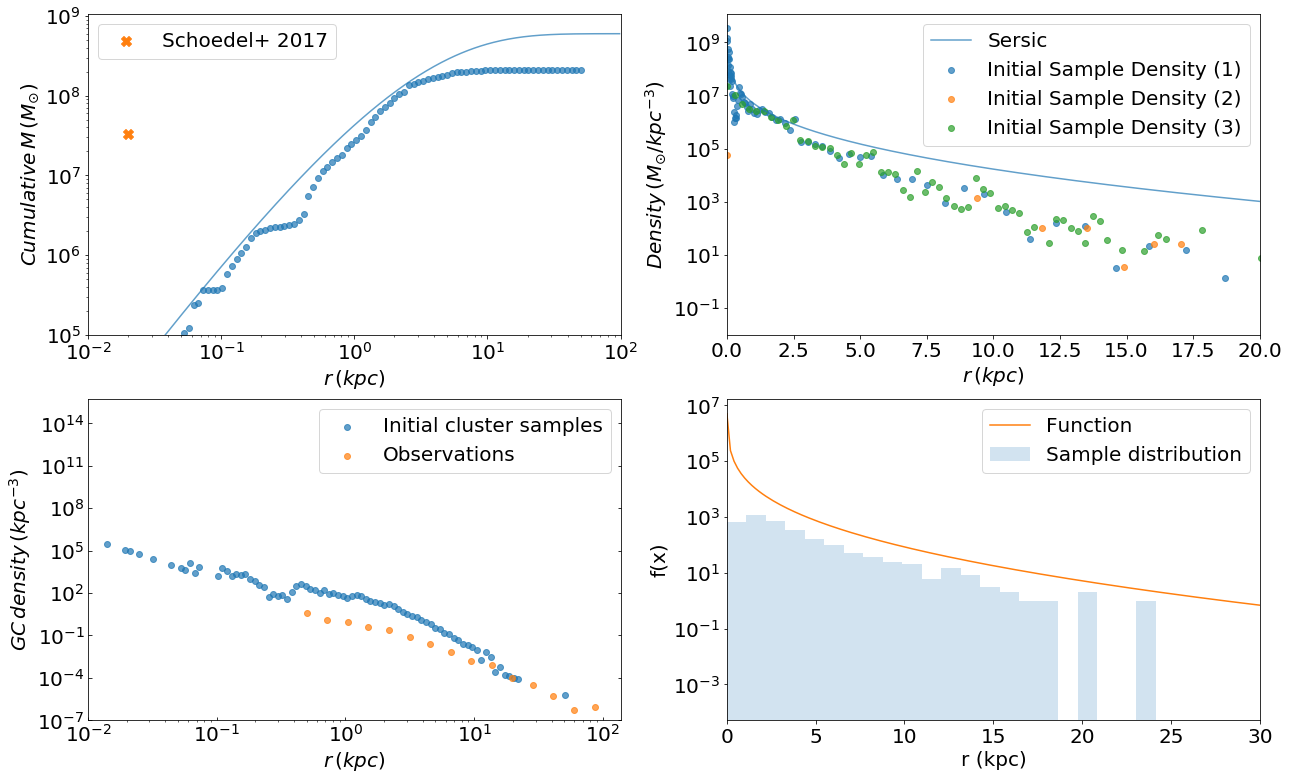

In [16]:
###########Analytical Model
##Cumulative mass of initial clusters as a function of the galactocentric radius
##Inital cluster number density distribution
sample_init = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/cluster_analytical_initial_M_RG_fcl0.012_ffa0.006_xcut3.0_xmin0.01.dat', 
                            dtype = str)
Mgc_init = sample_init[:,0].astype(np.float)
Rg_init = sample_init[:,1].astype(np.float)
#print(Mgc)

logbin_init = np.logspace(np.log10(min(Rg_init)), np.log10(max(Rg_init)), 101)
ngc_init, rgc_init= np.histogram(Rg_init, bins = logbin_init)
print(ngc_init)


mgc_init = np.zeros(100)

for jj in range(len(rgc_init)-1):
    for xx in range(len(Rg_init)):
        if rgc_init[jj]<=Rg_init[xx]<rgc_init[jj+1]:
            mgc_init[jj]+=Mgc_init[xx]
    
cumul_mgc_init = np.cumsum(mgc_init)


#####Density (1); Binned evenly in logscale
density_init = []; rkpc_init = []; density_init_err = []
mass_density_init = []
for xx in range(len(ngc_init)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol_init = (2.*twopi/3.)*(rgc_init[xx+1]**3-rgc_init[xx]**3)
    density_init.append(ngc_init[xx]/vol_init)
    density_init_err.append(math.sqrt(ngc_init[xx])/vol_init)
    mass_density_init.append(mgc_init[xx]/vol_init)
    rkpc_init.append(rgc_init[xx])
print(density_init)
    
    
#####Density (2); Binned with equal volumn
volbin_init = np.linspace((2*twopi/3.)*min(Rg_init)**3, (2*twopi/3.)*max(Rg_init)**3, 201)
#print(volbin_init)
vol_diff = volbin_init[1]-volbin_init[0]
vol2rg_bin = (volbin_init*(3./2/twopi))**(1./3.)
#print(min(Rg_init), max(Rg_init))
#print(vol2rg_bin)
mden_init = []
m_equalvol = np.zeros(200)
for kk in range(len(vol2rg_bin)-1):
    for zz in range(len(Rg_init)):
        if vol2rg_bin[kk]<=Rg_init[zz]<vol2rg_bin[kk+1]:
            m_equalvol[kk]+=Mgc_init[zz]
    
for zz in range(len(volbin_init)-1):
    mden_init.append(m_equalvol[zz]/vol_diff)
    
#print(mden_init)
#####Density (3); Binned evenly in linear scale
linbin_init = np.linspace(min(Rg_init), max(Rg_init), 201)
ngc_init_lin, rgc_init_lin= np.histogram(Rg_init, bins = linbin_init)

m_lin = np.zeros(200)
for kk in range(len(rgc_init_lin)-1):
    for zz in range(len(Rg_init)):
        if rgc_init_lin[kk]<=Rg_init[zz]<rgc_init_lin[kk+1]:
            m_lin[kk]+=Mgc_init[zz]

mden_init_lin = []
for xx in range(len(rgc_init_lin)-1):
    vol_init_lin = (2.*twopi/3.)*(rgc_init_lin[xx+1]**3-rgc_init_lin[xx]**3)
    mden_init_lin.append(m_lin[xx]/vol_init_lin)

    
    
##########################################################    
##Observed cluster position
f_gc = 0.012
x_min = 0.01; x_max = 100.

data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
#print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
#print(ngc_hist, rgc_hist)

density = []; rkpc = []; density_err = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    density_err.append(math.sqrt(ngc_hist[xx])/vol)
    rkpc.append(rgc_hist[xx])
#print(density_err)

##Galaxy cumulative mass
rg_bin = np.logspace(np.log10(x_min), np.log10(x_max), 500)
#print(rg_bin)
M_bin = []
for ii in range(len(rg_bin)-1):
    rg_med = (rg_bin[ii+1]+rg_bin[ii])/2.
    Mr = 2*twopi*integrate.quad(lambda x: csv1.smdf(x)*x*x, 0., rg_med)[0]
    M_bin.append(Mr)
    
M_bin = f_gc*np.array(M_bin)
#################################################################
##Plotting
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(21,13))
#axs.scatter(rgc_disrp[:-1], cumul_nmsp)
axs[0][0].scatter(rgc_init[:-1], cumul_mgc_init, alpha=0.7)
axs[0][0].plot(rg_bin[:-1], M_bin, alpha=0.7)
axs[0][0].scatter(0.02, 3.3e7, marker = 'X', s=100, label = 'Schoedel+ 2017')
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_xlim(xmin = 0.01, xmax = 100.)
axs[0][0].set_ylim(ymin = 1e5)
axs[0][0].set_xlabel(r'$r\,(kpc)$')
axs[0][0].set_ylabel(r'$Cumulative\,M\,(M_{\odot})$')
axs[0][0].legend(loc = 'best')

xs = np.linspace(x_min, x_max, 5000)
ys = []
for ii in range(len(xs)):
    ys.append(csv1.smdf(xs[ii])*f_gc)
axs[0][1].scatter(rgc_init[:-1], mass_density_init, alpha=0.7, label = 'Initial Sample Density (1)')
axs[0][1].scatter(vol2rg_bin[:-1], mden_init, alpha=0.7, label = 'Initial Sample Density (2)')
axs[0][1].scatter(rgc_init_lin[:-1], mden_init_lin, alpha=0.7, label = 'Initial Sample Density (3)')
axs[0][1].plot(xs, ys, alpha=0.7, label = 'Sersic')
#axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
axs[0][1].set_xlim(xmin = 0.01, xmax = 20.)
#axs[0][1].set_ylim(ymin = 1e5)
axs[0][1].set_xlabel(r'$r\,(kpc)$')
axs[0][1].set_ylabel(r'$Density\,(M_{\odot}/kpc^{-3})$')
axs[0][1].legend(loc = 'upper right')

axs[1][0].scatter(rkpc_init, density_init, label = 'Initial cluster samples', alpha=0.7)
axs[1][0].scatter(rkpc, density, label = 'Observations', alpha=0.7)
axs[1][0].set_yscale('log')
axs[1][0].set_xscale('log')
axs[1][0].set_ylim(ymin = 0.0000001, ymax = 5e15)
axs[1][0].set_xlim(xmin = 0.01)
axs[1][0].set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs[1][0].set_xlabel(r'$r\,(kpc)$')
axs[1][0].legend(loc='best')
axs[1][0].tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)


xs = np.linspace(x_min, x_max, 500)
ys = csv1.smdf(xs)
axs[1][1].hist(Rg_init, bins=50,
    density=False, alpha=0.2, label="Sample distribution")
axs[1][1].plot(xs, ys*f_gc/(2*1e2), label="Function")
axs[1][1].set_xlim(0.05/2, 30.)
axs[1][1].set_yscale('log')
axs[1][1].set_xlabel("r (kpc)")
axs[1][1].set_ylabel("f(x)") 
axs[1][1].legend()


In [ ]:
###############Analytical Model
##Observed cluster position
data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
#print(ngc_hist, rgc_hist)

density = []; rkpc = []; density_err = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    density_err.append(math.sqrt(ngc_hist[xx])/vol)
    rkpc.append(rgc_hist[xx])
print(density_err)
    
##Disrputed cluster sample
sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/semi_analytic_model.txt', 
                             dtype = str)
rg_init = sample_disrp[:,1].astype(np.float)
rg_disrp = sample_disrp[:,4].astype(np.float)
type_disrp = sample_disrp[:,7].astype(np.int)

print(len(rg_disrp))
rg_disrp = rg_disrp[type_disrp==4]
print(len(rg_disrp))

logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 21)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)
#print(ngc_disrp)

density_disrp = []; rkpc_disrp = []; density_disrp_err = []
for xx in range(len(ngc_disrp)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol_disrp = (2.*twopi/3.)*(rgc_disrp[xx+1]**3-rgc_disrp[xx]**3)
    density_disrp.append(ngc_disrp[xx]/vol_disrp)
    density_disrp_err.append(math.sqrt(ngc_disrp[xx])/vol_disrp)
    rkpc_disrp.append(rgc_disrp[xx])
print(density_disrp_err)
    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(figsize = (8, 6))
axs.scatter(rkpc_disrp, density_disrp, label = 'Survived cluster samples', alpha=0.7)
axs.scatter(rkpc, density, label = 'Observations', alpha=0.7)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(ymin = 0.0000001, ymax = 5e5)
axs.set_xlim(xmin = 0.05)
axs.set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs.set_xlabel(r'$r\,(kpc)$')
axs.legend(loc='best')
axs.tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)

In [11]:
##Cluster disruption time and galactocentric distance distribution
#sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG_rg2_nondissol_rhcut.dat', dtype = str)
#rg_disrp = sample_disrp[:,6].astype(np.float)
#t_disrp = sample_disrp[:,7].astype(np.float)
#type_disrp = sample_disrp[:,9].astype(np.int)
#print(rg_disrp, t_disrp)
#
#fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 6))
#ax1.hist(rg_disrp[type_disrp == 1], bins = np.logspace(np.log10(min(rg_disrp[type_disrp == 1])), 
#                                                       np.log10(max(rg_disrp[type_disrp == 1])), 20),
#                                                       histtype = 'step', label = 'cluster reached center')
#ax1.hist(rg_disrp[type_disrp == 2], bins = np.logspace(np.log10(min(rg_disrp[type_disrp == 2])), 
#                                                       np.log10(max(rg_disrp[type_disrp == 2])), 20),
#                                                       histtype = 'step', label = 'cluster disrupted by tidal field')
#ax1.hist(rg_disrp[type_disrp == 3], bins = np.logspace(np.log10(min(rg_disrp[type_disrp == 3])), 
#                                                       np.log10(max(rg_disrp[type_disrp == 3])), 20),
#                                                       histtype = 'step', label = 'cluster disrupted')
#ax1.hist(rg_disrp[type_disrp == 4], bins = np.logspace(np.log10(min(rg_disrp[type_disrp == 4])), 
#                                                       np.log10(max(rg_disrp[type_disrp == 4])), 20),
#                                                       histtype = 'step', label = 'does not disrupt')
#ax2.hist(t_disrp, bins = np.logspace(np.log10(min(t_disrp)), np.log10(max(t_disrp)), 30), label = 'Time disrupted')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
#ax1.set_xlabel(r'$R\,(kpc)$')
#ax1.legend(loc='best', fontsize=12)
#
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#ax2.set_xlabel(r'$t\,(Myr)$')
#ax2.legend(loc='best', fontsize=12)

In [ ]:
###############Analytical Model
##Plotting Gamma-ray flux distribution
d_gc = 8.3
erg_gev = 624.151

##Read Observations
obser_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdE.xlsx',
                         names = ['deg', 'dnde_up', 'dnde_down', 'ref'])
obser_sr_data = pd.read_excel('/projects/b1095/syr904/projects/GCE/catalog/obser_data_dNdEsr.xlsx',
                         names = ['deg', 'dnde_sr', 'deg_left', 'deg_right', 'dndesr_up', 'dndesr_down', 'ref'])
deg = obser_data['deg']; dnde = (obser_data['dnde_up']+obser_data['dnde_down'])/2.
dnde_err_up = obser_data['dnde_up'] - dnde
dnde_err_down = dnde - obser_data['dnde_down']

deg_sr = obser_sr_data['deg']; dnde_sr = obser_sr_data['dnde_sr']
dnde_sr_err_up = obser_sr_data['dndesr_up'] - dnde_sr
dnde_sr_err_down = dnde_sr - obser_sr_data['dndesr_down']
deg_err_left = deg_sr - obser_sr_data['deg_left']
deg_err_right = obser_sr_data['deg_right'] - deg_sr



######################################################
##Read model data
sample_prop = np.genfromtxt('/projects/b1095/syr904/projects/GCE/analytical_model/semi_analytic_model.txt', dtype = str)
Lmsp = sample_prop[:,9].astype(np.float)
Lmsp[Lmsp < 0] = 0
rg_disrp = sample_prop[:,4].astype(np.float)
status_disrp = sample_disrp[:,7].astype(np.int)


#print(len(status_disrp), len(Lmsp[status_disrp==4]))
#Lmsp = Lmsp[status_disrp!=4]
#rg_disrp = rg_disrp[status_disrp!=4]


logbin_disrp = np.logspace(np.log10(min(rg_disrp)), np.log10(max(rg_disrp)), 101)
ngc_disrp, rgc_disrp= np.histogram(rg_disrp, bins = logbin_disrp)

lmsp_disrp = np.zeros(100); lmsp_disrp_old = np.zeros(100)
for jj in range(len(rgc_disrp)-1):
    for xx in range(len(rg_disrp)):
        if rgc_disrp[jj]<=rg_disrp[xx]<rgc_disrp[jj+1]:
            lmsp_disrp[jj]+=Lmsp[xx]
            

cumul_lmsp = np.cumsum(lmsp_disrp)

##Convert into Gev/cm^2/s and Gev/cm^2/s/sr
deg_model = np.arctan(rgc_disrp[:-1]/d_gc)*180/np.pi
cumu_lgev = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)
cumu_lgev_sr = cumul_lmsp*erg_gev/(2.*twopi*(d_gc*1000.*PC)**2)/(2*twopi*np.arctan(rgc_disrp[:-1]/d_gc)**2)
#print(cumu_lgev)


######################################################
cs_dnde = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'g', 'gold', 'salmon', 'cyan']
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(ncols = 2, figsize = (20, 6))
axs[0].set_xlabel(r'$\beta$ (deg)')
axs[0].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim(0.01,20.5)
axs[0].set_ylim(1e-8,5.*10**(-6))
axs[0].errorbar(deg, dnde, yerr = [dnde_err_down, dnde_err_up], fmt = 'o', markersize = 0.01,
                ecolor = cs_dnde, alpha=0.6)
axs[0].scatter(deg, dnde, color = cs_dnde, alpha=0.6)

axs[0].plot(deg_model, cumu_lgev, color = 'k', lw = 3, alpha=0.6)



cs_dndesr = ['r', 'orange', 'orange', 'orange', 'orange', 'orange', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
axs[1].set_xlabel(r'$\beta$ (deg)')
axs[1].set_ylabel(r'$E^2 dN/dE$ (Gev cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
axs[1].set_yscale('log')
#axs[1].set_xscale('log')
axs[1].set_xlim(0.5,20.5)
axs[1].set_ylim(5*1e-8,1.8*10**(-4))
axs[1].errorbar(deg_sr, dnde_sr, xerr = [deg_err_left, deg_err_right], yerr = [dnde_sr_err_down, dnde_sr_err_up], 
                fmt = 'o', markersize = 0.01,
                ecolor = cs_dndesr, alpha=0.6)
axs[1].scatter(deg_sr, dnde_sr, color = cs_dndesr, alpha=0.6)
axs[1].plot(deg_model, cumu_lgev_sr, color = 'k', lw = 3, alpha=0.6)

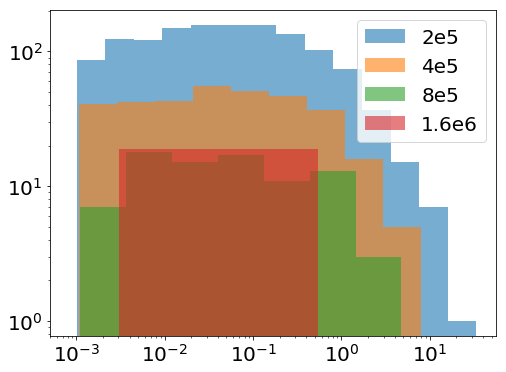

In [12]:
##Mass and initial Rgc scatter plot
sample_disrp = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/cluster_sample_disrupt_M_RG.dat', dtype = str)
nstar_disrp = sample_disrp[:,0]; rv_disrp = sample_disrp[:,1]
rg_model_disrp = sample_disrp[:,2]; z_disrp = sample_disrp[:,3]
rg_init = sample_disrp[:,5].astype(np.float)
rg_disrp = sample_disrp[:,6].astype(np.float)



fig, axs = plt.subplots(figsize = (8,6))
axs.hist(rg_init[nstar_disrp=='2e5'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='2e5'])), np.log10(max(rg_init[nstar_disrp=='2e5'])), 15),
         label = '2e5', alpha=0.6)
axs.hist(rg_init[nstar_disrp=='4e5'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='4e5'])), np.log10(max(rg_init[nstar_disrp=='4e5'])), 10),
         label = '4e5', alpha=0.6)
axs.hist(rg_init[nstar_disrp=='8e5'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='8e5'])), np.log10(max(rg_init[nstar_disrp=='8e5'])), 8),
         label = '8e5', alpha=0.6)
axs.hist(rg_init[nstar_disrp=='1.6e6'], bins = np.logspace(np.log10(min(rg_init[nstar_disrp=='1.6e6'])), np.log10(max(rg_init[nstar_disrp=='1.6e6'])), 2),
         label = '1.6e6', alpha=0.6)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_xlim(xmin = 0.0005)
axs.legend(loc = 'best')

0.5 124.6
[ 4  4  9 12 20 21 19 16 11 19  7  6  3  1  5] [  0.5          0.72233702   1.04354154   1.50757738   2.1779579
   3.14643925   4.5455791    6.56688013   9.48700125  13.70562444
  19.80015985  28.60477694  41.3245787   59.70054612  86.24782923
 124.6       ]


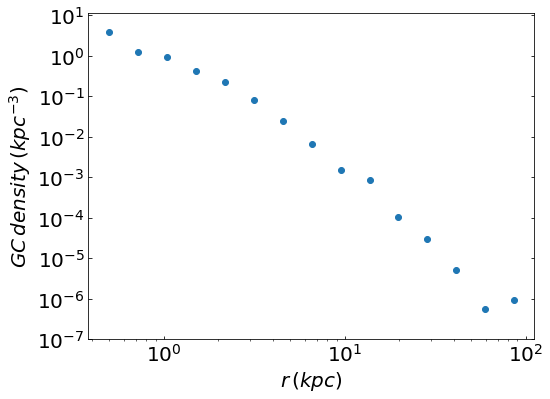

In [8]:
##GC number density from Harris Catalog
data_harris = pd.read_excel('/projects/b1095/syr904/projects/harris_catalog/harris_part1.xlsx',
                           names = ['ID', 'L', 'B', 'Rsun', 'Rgc', 'X', 'Y', 'Z'])
R_gc = list(data_harris['Rgc'])
print(min(R_gc), max(R_gc))

logbin = np.logspace(np.log10(min(R_gc)), np.log10(max(R_gc)), 16)
ngc_hist, rgc_hist = np.histogram(R_gc, bins=logbin)
print(ngc_hist, rgc_hist)

density = []; rkpc = []
for xx in range(len(ngc_hist)):
    #vol = 2.*twopi*rgc_hist[xx]**2*(rgc_hist[xx+1]-rgc_hist[xx])
    vol = (2.*twopi/3.)*(rgc_hist[xx+1]**3-rgc_hist[xx]**3)
    density.append(ngc_hist[xx]/vol)
    rkpc.append(rgc_hist[xx])
    
    
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(figsize = (8, 6))
axs.scatter(rkpc, density)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(ymin = 0.0000001)
axs.set_ylabel(r'$GC\,density\,(kpc^{-3})$')
axs.set_xlabel(r'$r\,(kpc)$')
axs.tick_params(top=False, right=True, direction = 'in')
plt.locator_params(axis='y', numticks=10)

In [ ]:
##Plot the distribution of formation time of MSPs
historyfiles=np.sort(glob('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/MSPBHinGC/data/history/MSP/*'))

ft=[]
for i in range(len(historyfiles)):
    with open(historyfiles[i], 'r') as fhist:
        next(fhist)
        for line in fhist:
            datahist=line.split()
            if int(datahist[8])==13 and float(datahist[2])<=0.03:
                ft.append(float(datahist[0])/1000.)
                break
            
plt.figure()
plt.hist(ft, bins=10, alpha=0.7)
plt.xlabel('Formation Time (Gyr)')
plt.ylabel('N')

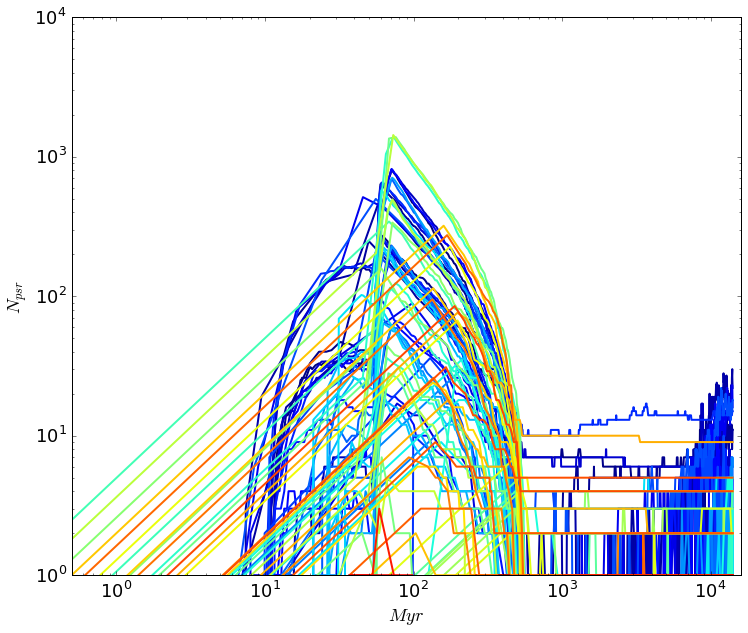

In [42]:
##Cumulative distribution of Npsr vs. time
paths=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/path_nondissolved_newruns.dat', dtype=str)
#print paths

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 10]
c = cm.jet(np.linspace(0, 1, 110))

plt.figure()
for i in range(len(paths)):
    filestr=paths[i]+'initial'
    datans=np.genfromtxt(filestr+'.ns.dat')
    t_conv=ns.conv('t', filestr+'.conv.sh')
    t=np.array(datans[:,0])*t_conv; Npsr=np.array(datans[:,5])
    plt.plot(t, Npsr, color=c[i], lw=2.)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 16000.)
#plt.ylim(-0.5, 1000.)
plt.xlabel(r'$Myr$')
plt.ylabel(r'$N_{psr}$')